<a href="https://colab.research.google.com/github/FGalvao77/Text-analysis---stress-detection/blob/main/Text_analysis_stress_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Text analysis - stress detection**
---
---

In [ ]:
!curl https://raw.githubusercontent.com/FGalvao77/datasets/main/stress.csv >> stress.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2657k  100 2657k    0     0  5715k      0 --:--:-- --:--:-- --:--:-- 5715k


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython import get_ipython
from pylab import rcParams

%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 14, 5

In [ ]:
data = pd.read_csv(filepath_or_buffer='stress.csv')

In [ ]:
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
data.tail()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,961,1,0.571429,1488909516,2,0.835254,...,1.0000,1.0000,1.0,1.68891,1.44615,1.89707,0.76,2,2.412000,0.016667


In [ ]:
data.shape

(2838, 116)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [ ]:
data.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [ ]:
data.isnull().any()

subreddit                   False
post_id                     False
sentence_range              False
text                        False
id                          False
                            ...  
lex_dal_avg_pleasantness    False
social_upvote_ratio         False
social_num_comments         False
syntax_fk_grade             False
sentiment                   False
Length: 116, dtype: bool

In [ ]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [ ]:
data['subreddit'].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [ ]:
data['subreddit'].value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [ ]:
data['subreddit'].value_counts(normalize=True).sort_values(ascending=False) * 100

ptsd                20.577872
relationships       19.450317
anxiety             17.723749
domesticviolence    11.134602
assistance          10.183228
survivorsofabuse     8.632840
homeless             5.919662
almosthomeless       2.818887
stress               2.255109
food_pantry          1.303735
Name: subreddit, dtype: float64

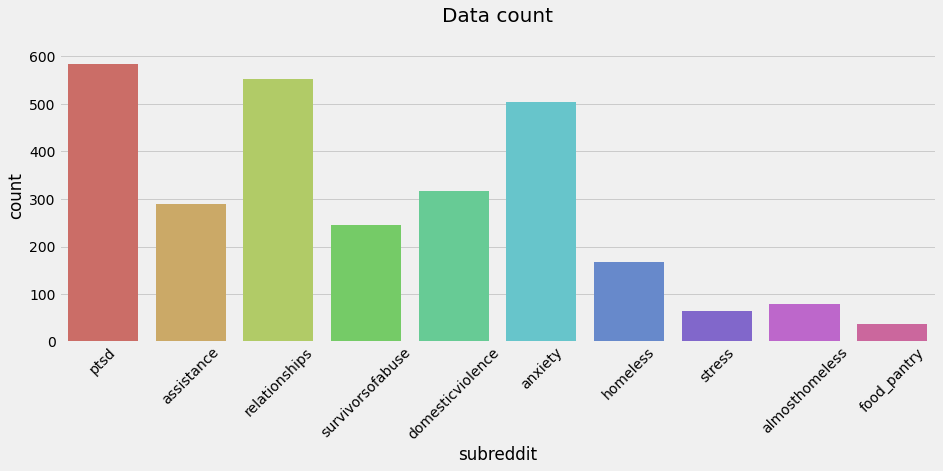

In [ ]:
sns.countplot(x=data['subreddit'], data=data, palette='hls')

plt.title('Data count\n', size=20)
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['label'].unique()

array([1, 0])

In [ ]:
data['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

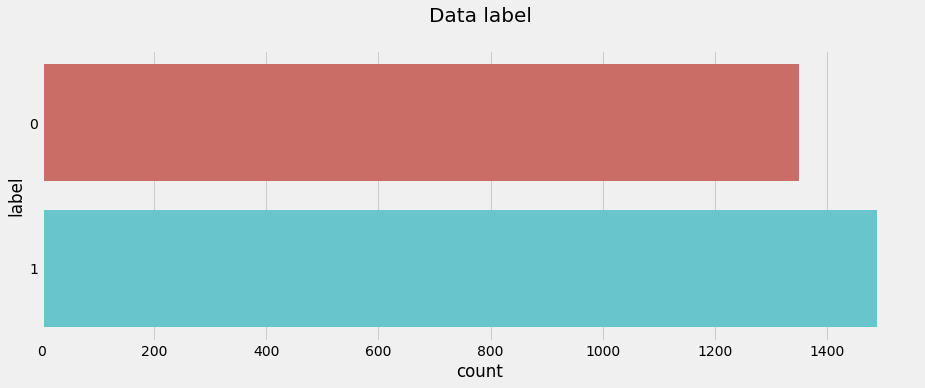

In [ ]:
sns.countplot(y=data['label'], data=data, palette='hls')

plt.title('Data label\n', size=20)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# particionando os dados para treino/validação e teste
test_data_samples = data.sample(10, random_state=1522)
data_ = data.drop(test_data_samples.index)

test_data_samples.reset_index(drop=True, inplace=True)
data_.reset_index(drop=True, inplace=True)

print('Data for training and validation: ' + str(data_.shape))
print('Test data: ' + str(test_data_samples.shape))

Data for training and validation: (2828, 116)
Test data: (10, 116)


In [ ]:
# visualizando o conjunto de dados das amostras de teste
test_data_samples

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,7xu04j,"[15, 20]",During my service I got suddenly rowdy and wou...,1440,1,0.800000,1518732536,4,5.046934,...,1.0000,1.0000,1.0,1.73346,1.60825,1.89877,0.76,2,6.228711,0.180519
1,survivorsofabuse,6ajh8q,"[0, 5]",Some monsters are real. I was abused by some a...,1535,1,0.600000,1494501735,12,3.856282,...,1.0000,1.2000,1.0,1.79797,1.45479,1.91717,1.00,6,4.599221,0.000000
2,anxiety,98uic9,"[0, 5]","So, I used tap water in a neti pot. My cold se...",1560,0,0.571429,1534778510,1,1.916656,...,1.1429,1.1429,1.0,1.66668,1.76949,1.84022,1.00,3,3.181932,-0.161429
3,ptsd,8bva4d,"[0, 5]","Yo, straight up. I am so goddamn sick of it. Y...",555,1,0.800000,1523581069,2,2.786800,...,1.0000,1.1429,1.0,1.73332,1.39070,1.87520,0.67,5,4.358000,0.173214
4,anxiety,8giq2q,"[4, 9]",I never had that symptom before and I just wan...,757,1,0.500000,1525278420,8,4.513770,...,1.0000,1.1429,1.0,1.71339,1.29362,1.72979,1.00,22,4.643410,-0.116667
5,ptsd,9u1ycz,"(30, 35)","I don't have any point, I'm just overwhelmed a...",19130,1,1.000000,1541320473,44,1.160051,...,1.2000,1.1818,1.0,1.67679,1.43200,1.86081,0.96,16,3.158077,-0.310000
6,anxiety,5xpd3v,"[0, 5]","This has been affecting me for two weeks now, ...",575,1,1.000000,1488751075,3,2.945795,...,1.1429,1.0000,1.0,1.66110,1.43860,1.82830,1.00,2,4.154447,-0.259524
7,ptsd,9ejyka,"(0, 5)","Previously, I have posted on this subreddit ab...",36113,0,1.000000,1536556620,2,7.196967,...,1.1667,1.1250,1.0,1.68609,1.49130,1.78270,0.60,0,7.380451,0.120833
8,almosthomeless,9b4ig4,"[15, 20]",My Social Security disability case is still wi...,458,0,1.000000,1535503266,3,11.734237,...,1.0000,1.0000,1.0,1.65477,1.51389,1.84525,0.66,3,10.981667,0.071176
9,domesticviolence,91cw34,"[50, 55]",I offered to help but he declined. After 6 mon...,1927,0,0.600000,1532394591,3,0.811640,...,1.0000,1.1429,1.0,1.73393,1.43611,1.82485,1.00,3,2.762363,-0.107143


In [ ]:
# selecionando as colunas de interesse, são elas: "text" e "label"
test_data_samples = test_data_samples[['text', 'label']]

test_data_samples

,text,label
0,During my service I got suddenly rowdy and wou...,1
1,Some monsters are real. I was abused by some a...,1
2,"So, I used tap water in a neti pot. My cold se...",0
3,"Yo, straight up. I am so goddamn sick of it. Y...",1
4,I never had that symptom before and I just wan...,1
5,"I don't have any point, I'm just overwhelmed a...",1
6,"This has been affecting me for two weeks now, ...",1
7,"Previously, I have posted on this subreddit ab...",0
8,My Social Security disability case is still wi...,0
9,I offered to help but he declined. After 6 mon...,0


In [ ]:
data_.shape

(2828, 116)

In [ ]:
import string
import nltk
import re

from nltk.corpus import stopwords

nltk.download('stopwords')

stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_preprocessing(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    text = [word for word in text.split(' ') if word not in stopword]
    text = ' '.join (text)

    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ' '.join(text)

    return text

In [ ]:
treated_data = data_.copy()

In [ ]:
treated_data['text'] = treated_data['text'].apply(text_preprocessing)

In [ ]:
treated_data['text'].head()

0    said felt way sugget go rest trigger ahead you...
1    hey rassist sure right place post goe  im curr...
2    mom hit newspap shock would know dont like pla...
3    met new boyfriend amaz kind sweet good student...
4    octob domest violenc awar month domest violenc...
Name: text, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
text = ' '.join(i for i in treated_data.text)

stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color='black').generate(text)

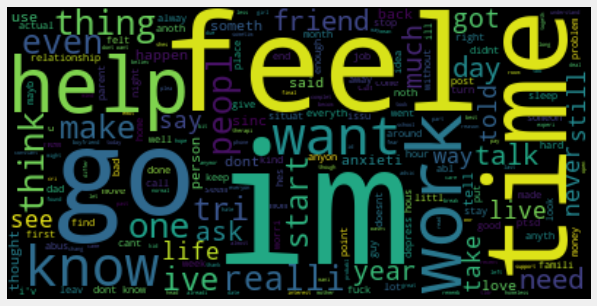

In [ ]:
plt.imshow(X=wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
treated_data['label'].unique()

array([1, 0])

In [ ]:
treated_data['label'] = treated_data['label'].map(
    {0: 'no stress', 1: 'stress'}
)

In [ ]:
treated_data['label'].value_counts()

stress       1482
no stress    1346
Name: label, dtype: int64

In [ ]:
treated_data.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [ ]:
treated_data = treated_data[['text', 'label']]

treated_data.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,stress
1,hey rassist sure right place post goe im curr...,no stress
2,mom hit newspap shock would know dont like pla...,stress
3,met new boyfriend amaz kind sweet good student...,stress
4,octob domest violenc awar month domest violenc...,stress


In [ ]:
X = np.array(treated_data['text'])
y = np.array(treated_data['label'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vector = CountVectorizer(stop_words='english', max_df=1.0) # CountVectorizer

X_cv = count_vector.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split as tts 

In [ ]:
Xtrain, Xval, ytrain, yval = tts(
    X_cv, y, test_size=0.2, random_state=1522
)

In [ ]:
%%capture
%pip install catboost

In [ ]:
from sklearn.linear_model import (LogisticRegression, 
                                  PassiveAggressiveClassifier, 
                                  SGDClassifier, 
                                  Perceptron)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier,
                              AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

<br>

#### **Logistic Regression**

In [ ]:
logReg =  LogisticRegression(penalty='l2', n_jobs=-1, random_state=1522)

logReg.fit(Xtrain, ytrain)

LogisticRegression(n_jobs=-1, random_state=1522)

In [ ]:
logReg.score(Xtrain, ytrain)

0.9920424403183024

In [ ]:
logReg.score(Xval, yval)

0.7438162544169611

In [ ]:
def model_training(model, Xtrain, ytrain):
    result = model.fit(Xtrain, ytrain)
    return result

In [ ]:
logReg = model_training(model=LogisticRegression(penalty='l2', n_jobs=-1, 
                                                 random_state=1522), 
                        Xtrain=Xtrain, ytrain=ytrain)

logReg

LogisticRegression(n_jobs=-1, random_state=1522)

In [ ]:
def model_score(model, X, y, model_name='', source_data=''):
    result = round(model.score(X, y), 5)
    print(f'Model name: {model_name} | Source data: {source_data}')
    return result

In [ ]:
model_score(model=logReg, X=Xtrain, y=ytrain, 
            model_name='Logistic Regression', source_data='Train')

Model name: Logistic Regression | Source data: Train


0.99204

In [ ]:
model_score(model=logReg, X=Xval, y=yval, 
            model_name='Logistic Regression', source_data='Validation')

Model name: Logistic Regression | Source data: Validation


0.74382

In [ ]:
def model_score2(model, Xtrain, ytrain, Xval, yval, model_name=''):
    result_train, result_val = round(model.score(Xtrain, 
                                                 ytrain), 5), round(model.score(Xval, 
                                                                                yval), 5)
    print(f'Model name: {model_name}')
    return f'Train: {result_train} | Val: {result_val}'

In [ ]:
model_score2(model=logReg, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Logistic Regression')

Model name: Logistic Regression


'Train: 0.99204 | Val: 0.74382'

<br>

#### **Passive Aggressive**

In [ ]:
passAgg = model_training(model=PassiveAggressiveClassifier(random_state=1522), 
                        Xtrain=Xtrain, ytrain=ytrain)

passAgg

PassiveAggressiveClassifier(random_state=1522)

In [ ]:
# model_score(model=passAgg, X=Xtrain, y=ytrain, 
#             model_name='Passive Aggressive', source_data='Train')

In [ ]:
# model_score(model=passAgg, X=Xval, y=yval, 
#             model_name='Passive Aggressive', source_data='Validation')

In [ ]:
model_score2(model=passAgg, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Passive Aggressive')

Model name: Passive Aggressive


'Train: 0.99867 | Val: 0.68375'

<br>

#### **SGD**

In [ ]:
sgd = model_training(model=SGDClassifier(average=True,n_jobs=-1, 
                                         random_state=1522), 
                     Xtrain=Xtrain, ytrain=ytrain)

sgd

SGDClassifier(average=True, n_jobs=-1, random_state=1522)

In [ ]:
# model_score(model=sgd, X=Xtrain, y=ytrain, 
#             model_name='SGD', source_data='Train')

In [ ]:
# model_score(model=sgd, X=Xval, y=yval, 
#             model_name='SGD', source_data='Validation')

In [ ]:
model_score2(model=sgd, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='SGD')

Model name: SGD


'Train: 0.99027 | Val: 0.73322'

<br>

#### **Perceptron**

In [ ]:
percep = model_training(model=Perceptron(n_jobs=-1, random_state=1522), 
                     Xtrain=Xtrain, ytrain=ytrain)

percep

Perceptron(n_jobs=-1, random_state=1522)

In [ ]:
# model_score(model=percep, X=Xtrain, y=ytrain, 
#             model_name='Perceptron', source_data='Train')

In [ ]:
# model_score(model=percep, X=Xval, y=yval, 
#             model_name='Perceptron', source_data='Validation')

In [ ]:
model_score2(model=percep, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Perceptron')

Model name: Perceptron


'Train: 0.99027 | Val: 0.68198'

<br>

#### **Decision Tree**

In [ ]:
decTree = model_training(model=DecisionTreeClassifier(criterion='gini', 
                                                      random_state=1522), 
                         Xtrain=Xtrain, ytrain=ytrain)

decTree

DecisionTreeClassifier(random_state=1522)

In [ ]:
# model_score(model=decTree, X=Xtrain, y=ytrain, 
#             model_name='Decision Tree', source_data='Train')

In [ ]:
# model_score(model=decTree, X=Xval, y=yval, 
#             model_name='Decision Tree', source_data='Validation')

In [ ]:
model_score2(model=decTree, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Decision Tree')

Model name: Decision Tree


'Train: 0.99867 | Val: 0.64488'

<br>

#### **Random Forest**

In [ ]:
randFor = model_training(model=RandomForestClassifier(n_estimators=1000, 
                                                      criterion='gini', 
                                                      n_jobs=-1, 
                                                      random_state=1522, ), 
                         Xtrain=Xtrain, ytrain=ytrain)

randFor

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1522)

In [ ]:
# model_score(model=randFor, X=Xtrain, y=ytrain, 
#             model_name='Random Forest', source_data='Train')

In [ ]:
# model_score(model=randFor, X=Xval, y=yval, 
#             model_name='Random Forest', source_data='Validation')

In [ ]:
model_score2(model=randFor, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Random Forest')

Model name: Random Forest


'Train: 0.99867 | Val: 0.74558'

<br>

#### **Gradient Boosting**

In [ ]:
gradBoost = model_training(model=GradientBoostingClassifier(n_estimators=1000,
                                                            learning_rate=0.09, 
                                                            random_state=1522), 
                         Xtrain=Xtrain, ytrain=ytrain)

gradBoost

GradientBoostingClassifier(learning_rate=0.09, n_estimators=1000,
                           random_state=1522)

In [ ]:
# model_score(model=gradBoost, X=Xtrain, y=ytrain, 
#             model_name='Gradient Boosting', source_data='Train')

In [ ]:
# model_score(model=gradBoost, X=Xval, y=yval, 
#             model_name='Gradient Boosting', source_data='Validation')

In [ ]:
model_score2(model=gradBoost, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Gradient Boosting')

Model name: Gradient Boosting


'Train: 0.99248 | Val: 0.74912'

<br>

#### **Ada Boost**

In [ ]:
ada = model_training(AdaBoostClassifier(n_estimators=1000, learning_rate=0.09, 
                                        random_state=1522), 
                     Xtrain=Xtrain, ytrain=ytrain)

ada

AdaBoostClassifier(learning_rate=0.09, n_estimators=1000, random_state=1522)

In [ ]:
# model_score(model=ada, X=Xtrain, y=ytrain, 
#             model_name='Ada Boost', source_data='Train')

In [ ]:
# model_score(model=ada, X=Xval, y=yval, 
#             model_name='Ada Boost', source_data='Validation')

In [ ]:
model_score2(model=ada, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Ada Boost')

Model name: Ada Boost


'Train: 0.86163 | Val: 0.73852'

<br>

#### **K Neighbors**

In [ ]:
kn = model_training(model=KNeighborsClassifier(n_neighbors=2, n_jobs=-1), 
                         Xtrain=Xtrain, ytrain=ytrain)

kn

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [ ]:
# model_score(model=kn, X=Xtrain, y=ytrain, 
#             model_name='K Neighbors', source_data='Train')

In [ ]:
# model_score(model=kn, X=Xval, y=yval, 
#             model_name='K Neighbors', source_data='Validation')

In [ ]:
model_score2(model=kn, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='K Neighbors')

Model name: K Neighbors


'Train: 0.95137 | Val: 0.53357'

<br>

#### **Bernoulli NB**

In [ ]:
bernoulli = model_training(model=BernoulliNB(), 
                           Xtrain=Xtrain, ytrain=ytrain)

bernoulli

BernoulliNB()

In [ ]:
# model_score(model=bernoulli, X=Xtrain, y=ytrain, 
#             model_name='Bernoulli NB', source_data='Train')

In [ ]:
# model_score(model=bernoulli, X=Xval, y=yval, 
#             model_name='Bernoulli NB', source_data='Validation')

In [ ]:
model_score2(model=bernoulli, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Bernoulli NB')

Model name: Bernoulli NB


'Train: 0.90937 | Val: 0.75618'

<br>

#### **Gaussian NB**

In [ ]:
gaussian = model_training(model=GaussianNB(), 
                           Xtrain=Xtrain.toarray(), ytrain=ytrain)

gaussian

GaussianNB()

In [ ]:
# model_score(model=gaussian, X=Xtrain.toarray(), y=ytrain, 
#             model_name='Gaussian NB', source_data='Train')

In [ ]:
# model_score(model=gaussian, X=Xval.toarray(), y=yval, 
#             model_name='Gaussian NB', source_data='Validation')

In [ ]:
model_score2(model=gaussian, 
             Xtrain=Xtrain.toarray(), ytrain=ytrain, 
             Xval=Xval.toarray(), yval=yval, 
             model_name='Gaussian NB')

Model name: Gaussian NB


'Train: 0.91821 | Val: 0.57951'

<br> 

#### **MLP**

In [ ]:
mlp = model_training(model=MLPClassifier(hidden_layer_sizes=(100, 150, 50, 2), 
                                         learning_rate='adaptive', 
                                         activation='relu', random_state=1522), 
                     Xtrain=Xtrain, ytrain=ytrain)

mlp

MLPClassifier(hidden_layer_sizes=(100, 150, 50, 2), learning_rate='adaptive',
              random_state=1522)

In [ ]:
# model_score(model=mlp, X=Xtrain, y=ytrain, 
#             model_name='MLP', source_data='Train')

In [ ]:
# model_score(model=mlp, X=Xval, y=yval, 
#             model_name='MLP', source_data='Validation')

In [ ]:
model_score2(model=mlp, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='MLP')

Model name: MLP


'Train: 0.98939 | Val: 0.68198'

<br>

#### **XGB**

In [ ]:
xgb = model_training(model=XGBClassifier(n_estimators=1000, n_jobs=-1, 
                                         random_state=1522),
                     Xtrain=Xtrain, ytrain=ytrain)

xgb

XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=1522)

In [ ]:
# model_score(model=xgb, X=Xtrain, y=ytrain, 
#             model_name='XGB', source_data='Train')

In [ ]:
# model_score(model=xgb, X=Xval, y=yval, 
#             model_name='XGB', source_data='Validation')

In [ ]:
model_score2(model=xgb, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='XGB')

Model name: XGB


'Train: 0.96773 | Val: 0.77032'

<br>

#### **Cat Boost**

In [ ]:
# ?CatBoostClassifier

In [ ]:
catBoost = model_training(model=CatBoostClassifier(n_estimators=1000, 
                                                   learning_rate=0.09, 
                                                   random_state=1522, 
                                                   verbose=False),
                          Xtrain=Xtrain, ytrain=ytrain)

catBoost

In [ ]:
# model_score(model=catBoost, X=Xtrain, y=ytrain, 
#             model_name='Cat Boost', source_data='Train')

In [ ]:
# model_score(model=catBoost, X=Xval, y=yval, 
#             model_name='Cat Boost', source_data='Validation')

In [ ]:
model_score2(model=catBoost, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Cat Boost')

Model name: Cat Boost


'Train: 0.99823 | Val: 0.76148'

<br>

#### **Test of the three most promising models**

In [ ]:
model_score2(model=xgb, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='XG Boost')

Model name: XG Boost


'Train: 0.96773 | Val: 0.77032'

In [ ]:
model_score2(model=catBoost, 
             Xtrain=Xtrain.toarray(), ytrain=ytrain, 
             Xval=Xval.toarray(), yval=yval, 
             model_name='Cat Boost')

Model name: Cat Boost


'Train: 0.99823 | Val: 0.76148'

In [ ]:
model_score2(model=bernoulli, 
             Xtrain=Xtrain, ytrain=ytrain, 
             Xval=Xval, yval=yval, 
             model_name='Bernoulli NB')

Model name: Bernoulli NB


'Train: 0.90937 | Val: 0.75618'

In [ ]:
# visualizando as amostras do conjunto de dados de teste
test_data_samples 

,text,label
0,During my service I got suddenly rowdy and wou...,1
1,Some monsters are real. I was abused by some a...,1
2,"So, I used tap water in a neti pot. My cold se...",0
3,"Yo, straight up. I am so goddamn sick of it. Y...",1
4,I never had that symptom before and I just wan...,1
5,"I don't have any point, I'm just overwhelmed a...",1
6,"This has been affecting me for two weeks now, ...",1
7,"Previously, I have posted on this subreddit ab...",0
8,My Social Security disability case is still wi...,0
9,I offered to help but he declined. After 6 mon...,0


In [ ]:
# # XGB, Cat Boost, Bernoulli
text_input = input('Enter a text: ')

data = count_vector.transform([text_input]).toarray()

output_xgb = xgb.predict(data)
output_catboost = catBoost.predict(data)
output_bernoulli = bernoulli.predict(data)

print('\tPREDICTIONS')
print('=' * 30)
print(f'XG Boost: {output_xgb}', 
      f'Cat Boost: {output_catboost}', 
      f'Bernoulli: {output_bernoulli}', 
      sep='\n')

Enter a text: I tired
	PREDICTIONS
XG Boost: ['stress']
Cat Boost: ['no stress']
Bernoulli: ['no stress']


In [ ]:
feature = 'text'
size = len(test_data_samples)

feature, size

('text', 10)

In [ ]:
import random

In [ ]:
sample = random.randint(0, size-1)

sample

5

Test text:


In [ ]:
sample = random.randint(0, size-1)

test = test_data_samples[feature][sample]

test

'Previously, I have posted on this subreddit about how studies have demonstrated the beneficial effects turmeric can have on PTSD symptoms. See <url>  and <url>  . &#x200B; However, too much of a good thing can turn sour. When taking anything natural in supplemental doses that exceed what is found in the diet, we should treat them as drugs.'

In [ ]:
# XGB , Cat Boost, Bernoulli
# text_input = input('Enter a text: ')

sample = random.randint(0, size-1)
test = test_data_samples[feature][sample]
display(test)
print('\n')
text_input = test

data = count_vector.transform([text_input]).toarray()

output_xgb = xgb.predict(data)
output_catboost = catBoost.predict(data)
output_bernoulli = bernoulli.predict(data)

print('\tPREDICTIONS')
print('=' * 30)
print(f'XG Boost: {output_xgb}', 
      f'Cat Boost: {output_catboost}', 
      f'Bernoulli: {output_bernoulli}', 
      sep='\n')

'Previously, I have posted on this subreddit about how studies have demonstrated the beneficial effects turmeric can have on PTSD symptoms. See <url>  and <url>  . &#x200B; However, too much of a good thing can turn sour. When taking anything natural in supplemental doses that exceed what is found in the diet, we should treat them as drugs.'



	PREDICTIONS
XG Boost: ['stress']
Cat Boost: ['no stress']
Bernoulli: ['no stress']


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
models_ensemble1 = VotingClassifier([ 
    ('XG Boost', xgb),
    ('Cat Boost', catBoost),
    ('Bernoulli NB', bernoulli)
])

models_ensemble1

VotingClassifier(estimators=[('XG Boost',
                              XGBClassifier(n_estimators=1000, n_jobs=-1,
                                            random_state=1522)),
                             ('Cat Boost',
                              <catboost.core.CatBoostClassifier object at 0x7fe56f116310>),
                             ('Bernoulli NB', BernoulliNB())])

In [ ]:
ensemble1 = model_training(model=models_ensemble1,
                          Xtrain=Xtrain, ytrain=ytrain)

ensemble1

VotingClassifier(estimators=[('XG Boost',
                              XGBClassifier(n_estimators=1000, n_jobs=-1,
                                            random_state=1522)),
                             ('Cat Boost',
                              <catboost.core.CatBoostClassifier object at 0x7fe56f116310>),
                             ('Bernoulli NB', BernoulliNB())])

In [ ]:
model_score2(model=ensemble1, 
             Xtrain=Xtrain.toarray(), ytrain=ytrain, 
             Xval=Xval.toarray(), yval=yval, 
             model_name='Models ensemble 1')

Model name: Models ensemble 1


'Train: 0.92971 | Val: 0.74558'

In [ ]:
# Ensemble: XGB , Cat Boost, Bernoulli
# text_input = input('Enter a text: ')

print(test_data_samples)
sample = random.randint(0, size-1)
test = test_data_samples[feature][sample]

print('\n')
display(test)
print('\n')

text_input = test

data = count_vector.transform([text_input]).toarray()

output_ensemble1 = ensemble1.predict(data)

print('\tPREDICTIONS')
print('=' * 60)
print(f'Ensemble: XGB , Cat Boost, Bernoulli', 
      f'{output_ensemble1}', 
      sep='\n')

                                                text  label
0  During my service I got suddenly rowdy and wou...      1
1  Some monsters are real. I was abused by some a...      1
2  So, I used tap water in a neti pot. My cold se...      0
3  Yo, straight up. I am so goddamn sick of it. Y...      1
4  I never had that symptom before and I just wan...      1
5  I don't have any point, I'm just overwhelmed a...      1
6  This has been affecting me for two weeks now, ...      1
7  Previously, I have posted on this subreddit ab...      0
8  My Social Security disability case is still wi...      0
9  I offered to help but he declined. After 6 mon...      0




'I don\'t have any point, I\'m just overwhelmed and want to give up. No one\'s going to read this long of a post anyway. I don\'t want to tell my therapist, I don\'t want to go to therapy. It feels artificial and contrived and uneven. When I google all this shit the internet is like "That\'s the ptsd talking."'



	PREDICTIONS
Ensemble: XGB , Cat Boost, Bernoulli
['no stress']


In [ ]:
# Ensemble: XGB, Cat Boost, Bernoulli
# text_input = input('Enter a text: ')

print(test_data_samples)
# sample = random.randint(0, size-1)
text_input_0 = test_data_samples['text'][0]
text_input_1 = test_data_samples['text'][1]
text_input_2 = test_data_samples['text'][2]
text_input_3 = test_data_samples['text'][3]
text_input_4 = test_data_samples['text'][4]
text_input_5 = test_data_samples['text'][5]
text_input_6 = test_data_samples['text'][6]
text_input_7 = test_data_samples['text'][7]
text_input_8 = test_data_samples['text'][8]
text_input_9 = test_data_samples['text'][9]

# display(test)
print('\n')

data_0 = count_vector.transform([text_input_0]).toarray()
data_1 = count_vector.transform([text_input_1]).toarray()
data_2 = count_vector.transform([text_input_2]).toarray()
data_3 = count_vector.transform([text_input_3]).toarray()
data_4 = count_vector.transform([text_input_4]).toarray()
data_5 = count_vector.transform([text_input_5]).toarray()
data_6 = count_vector.transform([text_input_6]).toarray()
data_7 = count_vector.transform([text_input_7]).toarray()
data_8 = count_vector.transform([text_input_8]).toarray()
data_9 = count_vector.transform([text_input_9]).toarray()

output_ensemble_0 = ensemble1.predict(data_0)
output_ensemble_1 = ensemble1.predict(data_1)
output_ensemble_2 = ensemble1.predict(data_2)
output_ensemble_3 = ensemble1.predict(data_3)
output_ensemble_4 = ensemble1.predict(data_4)
output_ensemble_5 = ensemble1.predict(data_4)
output_ensemble_6 = ensemble1.predict(data_6)
output_ensemble_7 = ensemble1.predict(data_7)
output_ensemble_8 = ensemble1.predict(data_8)
output_ensemble_9 = ensemble1.predict(data_9)

print('\tPREDICTIONS')
print('=' * 60)
print(f'Ensemble: XGB , Cat Boost, Bernoulli\n', 
      f'Text 0: {output_ensemble_0}', 
      f'Text 1: {output_ensemble_1}', 
      f'Text 2: {output_ensemble_2}', 
      f'Text 3: {output_ensemble_3}', 
      f'Text 4: {output_ensemble_4}', 
      f'Text 5: {output_ensemble_5}', 
      f'Text 6: {output_ensemble_6}', 
      f'Text 7: {output_ensemble_7}', 
      f'Text 8: {output_ensemble_8}', 
      f'Text 9: {output_ensemble_9}', 
      sep='\n')

                                                text  label
0  During my service I got suddenly rowdy and wou...      1
1  Some monsters are real. I was abused by some a...      1
2  So, I used tap water in a neti pot. My cold se...      0
3  Yo, straight up. I am so goddamn sick of it. Y...      1
4  I never had that symptom before and I just wan...      1
5  I don't have any point, I'm just overwhelmed a...      1
6  This has been affecting me for two weeks now, ...      1
7  Previously, I have posted on this subreddit ab...      0
8  My Social Security disability case is still wi...      0
9  I offered to help but he declined. After 6 mon...      0


	PREDICTIONS
Ensemble: XGB , Cat Boost, Bernoulli

Text 0: ['stress']
Text 1: ['stress']
Text 2: ['no stress']
Text 3: ['stress']
Text 4: ['stress']
Text 5: ['stress']
Text 6: ['stress']
Text 7: ['no stress']
Text 8: ['no stress']
Text 9: ['stress']


In [ ]:
models_ensemble2 = VotingClassifier([ 
    ('Gradient Boost', gradBoost),
    ('Random Forest', randFor), 
    ('Logistic Regression', logReg)
])

models_ensemble2

VotingClassifier(estimators=[('Gradient Boost',
                              GradientBoostingClassifier(learning_rate=0.09,
                                                         n_estimators=1000,
                                                         random_state=1522)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=1522)),
                             ('Logistic Regression',
                              LogisticRegression(n_jobs=-1,
                                                 random_state=1522))])

In [ ]:
ensemble2 = model_training(model=models_ensemble2,
                          Xtrain=Xtrain, ytrain=ytrain)

ensemble2

VotingClassifier(estimators=[('Gradient Boost',
                              GradientBoostingClassifier(learning_rate=0.09,
                                                         n_estimators=1000,
                                                         random_state=1522)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=1522)),
                             ('Logistic Regression',
                              LogisticRegression(n_jobs=-1,
                                                 random_state=1522))])

In [ ]:
model_score2(model=ensemble2, 
             Xtrain=Xtrain.toarray(), ytrain=ytrain, 
             Xval=Xval.toarray(), yval=yval, 
             model_name='Models ensemble 2')

Model name: Models ensemble 2


'Train: 0.99735 | Val: 0.76325'

In [ ]:
# Ensemble 2: Gradient Boost, Random Forest, Logistic Regression

print(test_data_samples)

text_input_0 = test_data_samples['text'][0]
text_input_1 = test_data_samples['text'][1]
text_input_2 = test_data_samples['text'][2]
text_input_3 = test_data_samples['text'][3]
text_input_4 = test_data_samples['text'][4]
text_input_5 = test_data_samples['text'][5]
text_input_6 = test_data_samples['text'][6]
text_input_7 = test_data_samples['text'][7]
text_input_8 = test_data_samples['text'][8]
text_input_9 = test_data_samples['text'][9]

print('\n')

data_0 = count_vector.transform([text_input_0]).toarray()
data_1 = count_vector.transform([text_input_1]).toarray()
data_2 = count_vector.transform([text_input_2]).toarray()
data_3 = count_vector.transform([text_input_3]).toarray()
data_4 = count_vector.transform([text_input_4]).toarray()
data_5 = count_vector.transform([text_input_5]).toarray()
data_6 = count_vector.transform([text_input_6]).toarray()
data_7 = count_vector.transform([text_input_7]).toarray()
data_8 = count_vector.transform([text_input_8]).toarray()
data_9 = count_vector.transform([text_input_9]).toarray()

output_ensemble_0 = ensemble2.predict(data_0)
output_ensemble_1 = ensemble2.predict(data_1)
output_ensemble_2 = ensemble2.predict(data_2)
output_ensemble_3 = ensemble2.predict(data_3)
output_ensemble_4 = ensemble2.predict(data_4)
output_ensemble_5 = ensemble2.predict(data_4)
output_ensemble_6 = ensemble2.predict(data_6)
output_ensemble_7 = ensemble2.predict(data_7)
output_ensemble_8 = ensemble2.predict(data_8)
output_ensemble_9 = ensemble2.predict(data_9)

print('\tPREDICTIONS')
print('=' * 60)
print(f'Ensemble: Gradient Boost, Random Forest, Logistic Regression\n', 
      f'Text 0: {output_ensemble_0}', 
      f'Text 1: {output_ensemble_1}', 
      f'Text 2: {output_ensemble_2}', 
      f'Text 3: {output_ensemble_3}', 
      f'Text 4: {output_ensemble_4}', 
      f'Text 5: {output_ensemble_5}', 
      f'Text 6: {output_ensemble_6}', 
      f'Text 7: {output_ensemble_7}', 
      f'Text 8: {output_ensemble_8}', 
      f'Text 9: {output_ensemble_9}', 
      sep='\n')

                                                text  label
0  During my service I got suddenly rowdy and wou...      1
1  Some monsters are real. I was abused by some a...      1
2  So, I used tap water in a neti pot. My cold se...      0
3  Yo, straight up. I am so goddamn sick of it. Y...      1
4  I never had that symptom before and I just wan...      1
5  I don't have any point, I'm just overwhelmed a...      1
6  This has been affecting me for two weeks now, ...      1
7  Previously, I have posted on this subreddit ab...      0
8  My Social Security disability case is still wi...      0
9  I offered to help but he declined. After 6 mon...      0


	PREDICTIONS
Ensemble: Gradient Boost, Random Forest, Logistic Regression

Text 0: ['stress']
Text 1: ['stress']
Text 2: ['no stress']
Text 3: ['stress']
Text 4: ['stress']
Text 5: ['stress']
Text 6: ['no stress']
Text 7: ['no stress']
Text 8: ['no stress']
Text 9: ['stress']


In [ ]:
models_ensemble3 = VotingClassifier([ 
    ('Ensemble 1', ensemble1),
    ('Ensemble 2', ensemble2)
])

models_ensemble3

VotingClassifier(estimators=[('Ensemble 1',
                              VotingClassifier(estimators=[('XG Boost',
                                                            XGBClassifier(n_estimators=1000,
                                                                          n_jobs=-1,
                                                                          random_state=1522)),
                                                           ('Cat Boost',
                                                            <catboost.core.CatBoostClassifier object at 0x7fe56f116310>),
                                                           ('Bernoulli NB',
                                                            BernoulliNB())])),
                             ('Ensemble 2',
                              VotingClassifier(estimators=[('Gradient Boost',
                                                            GradientBoostingClassifier(learning_rate=0.09,
                                

In [ ]:
ensemble3 = model_training(model=models_ensemble3,
                          Xtrain=Xtrain, ytrain=ytrain)

ensemble3

VotingClassifier(estimators=[('Ensemble 1',
                              VotingClassifier(estimators=[('XG Boost',
                                                            XGBClassifier(n_estimators=1000,
                                                                          n_jobs=-1,
                                                                          random_state=1522)),
                                                           ('Cat Boost',
                                                            <catboost.core.CatBoostClassifier object at 0x7fe56f116310>),
                                                           ('Bernoulli NB',
                                                            BernoulliNB())])),
                             ('Ensemble 2',
                              VotingClassifier(estimators=[('Gradient Boost',
                                                            GradientBoostingClassifier(learning_rate=0.09,
                                

In [ ]:
model_score2(model=ensemble3, 
             Xtrain=Xtrain.toarray(), ytrain=ytrain, 
             Xval=Xval.toarray(), yval=yval, 
             model_name='Models ensemble 3')

Model name: Models ensemble 3


'Train: 0.99735 | Val: 0.77915'

In [ ]:
# Ensembles = Ensemble 1 + Ensemble 2
# Ensemble 1: XGB, Cat Boost, Bernoulli
# Ensemble 2: Gradient Boost, Random Forest, Logistic Regression

print(test_data_samples)

text_input_0 = test_data_samples['text'][0]
text_input_1 = test_data_samples['text'][1]
text_input_2 = test_data_samples['text'][2]
text_input_3 = test_data_samples['text'][3]
text_input_4 = test_data_samples['text'][4]
text_input_5 = test_data_samples['text'][5]
text_input_6 = test_data_samples['text'][6]
text_input_7 = test_data_samples['text'][7]
text_input_8 = test_data_samples['text'][8]
text_input_9 = test_data_samples['text'][9]

print('\n')

data_0 = count_vector.transform([text_input_0]).toarray()
data_1 = count_vector.transform([text_input_1]).toarray()
data_2 = count_vector.transform([text_input_2]).toarray()
data_3 = count_vector.transform([text_input_3]).toarray()
data_4 = count_vector.transform([text_input_4]).toarray()
data_5 = count_vector.transform([text_input_5]).toarray()
data_6 = count_vector.transform([text_input_6]).toarray()
data_7 = count_vector.transform([text_input_7]).toarray()
data_8 = count_vector.transform([text_input_8]).toarray()
data_9 = count_vector.transform([text_input_9]).toarray()

output_ensemble_0 = ensemble3.predict(data_0)
output_ensemble_1 = ensemble3.predict(data_1)
output_ensemble_2 = ensemble3.predict(data_2)
output_ensemble_3 = ensemble3.predict(data_3)
output_ensemble_4 = ensemble3.predict(data_4)
output_ensemble_5 = ensemble3.predict(data_4)
output_ensemble_6 = ensemble3.predict(data_6)
output_ensemble_7 = ensemble3.predict(data_7)
output_ensemble_8 = ensemble3.predict(data_8)
output_ensemble_9 = ensemble3.predict(data_9)

print('\tPREDICTIONS')
print('=' * 60)
print(f'Ensembles: Ensemble 1 + Ensemble 2', 
      f'Ensemble 1: XGB , Cat Boost, Bernoulli',
      f'Ensemble 2: Gradient Boost, Random Forest, Logistic Regression\n', 
      f'Text 0: {output_ensemble_0}', 
      f'Text 1: {output_ensemble_1}', 
      f'Text 2: {output_ensemble_2}', 
      f'Text 3: {output_ensemble_3}', 
      f'Text 4: {output_ensemble_4}', 
      f'Text 5: {output_ensemble_5}', 
      f'Text 6: {output_ensemble_6}', 
      f'Text 7: {output_ensemble_7}', 
      f'Text 8: {output_ensemble_8}', 
      f'Text 9: {output_ensemble_9}', 
      sep='\n')

                                                text  label
0  During my service I got suddenly rowdy and wou...      1
1  Some monsters are real. I was abused by some a...      1
2  So, I used tap water in a neti pot. My cold se...      0
3  Yo, straight up. I am so goddamn sick of it. Y...      1
4  I never had that symptom before and I just wan...      1
5  I don't have any point, I'm just overwhelmed a...      1
6  This has been affecting me for two weeks now, ...      1
7  Previously, I have posted on this subreddit ab...      0
8  My Social Security disability case is still wi...      0
9  I offered to help but he declined. After 6 mon...      0


	PREDICTIONS
Ensembles: Ensemble 1 + Ensemble 2
Ensemble 1: XGB , Cat Boost, Bernoulli
Ensemble 2: Gradient Boost, Random Forest, Logistic Regression

Text 0: ['stress']
Text 1: ['stress']
Text 2: ['no stress']
Text 3: ['stress']
Text 4: ['stress']
Text 5: ['stress']
Text 6: ['no stress']
Text 7: ['no stress']
Text 8: ['no stress']
Text

In [ ]:
treated_data = data_.copy()

In [ ]:
treated_data['text'] = treated_data['text'].apply(text_preprocessing)

In [ ]:
treated_data['label'].unique()

array([1, 0])

In [ ]:
# treated_data['label'] = treated_data['label'].map(
#     {0: 'no stress', 1: 'stress'}
# )

In [ ]:
# treated_data['label'].unique()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vector = TfidfVectorizer(stop_words='english', max_df=1.0) # TfidfVectorizer

tfidf_vector

TfidfVectorizer(stop_words='english')

In [ ]:
X = np.array(treated_data['text'])
y = np.array(treated_data['label'])

In [ ]:
X_tfidf = tfidf_vector.fit_transform(X)

In [ ]:
Xtrain, Xval, ytrain, yval = tts(
    X_tfidf, y, test_size=0.2, random_state=1522
)

In [ ]:
# Xtfidf_train = tfidf_vector.fit_transform(Xtrain)
# Xtfidf_val = tfidf_vector.transform(Xval)

In [ ]:
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay, 
                             roc_curve)

from sklearn.model_selection import cross_val_score, learning_curve

sns.set_theme(style='ticks', palette='pastel')

In [ ]:
# função para treinamento e validação do modelo
def model_training_validation(model, cv, X_train, X_val, 
                            #   y_train=y_train, y_val=y_val, 
                              name=''):

    # treinamento do modelo
    clf = model.fit(Xtrain.toarray(), ytrain)

    # calculando a métrica AUC com 10 validações cruzadas
    cv_auc = cross_val_score(estimator=clf, X=Xtrain.toarray(), y=ytrain, 
                             cv=cv, n_jobs=-1, scoring='roc_auc')
  
    # calculando a média geral da validação cruzada
    auc = np.mean(cv_auc).round(4)
  
    # realizando as previsões com o modelo
    y_pred = clf.predict(Xval.toarray())

    # plotando a matriz de confusão
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
    ConfusionMatrixDisplay.from_estimator(clf, Xval.toarray(), yval, 
                                          ax=ax1, cmap='YlGnBu')
    ax1.set_title(f'{name} - AUC: {auc}', size=16)

    # plotando a curva quando algoritmo cálcula as probabilidades
    if hasattr(clf, 'predict_proba'):

        # previsões de probabilidades para cada classe
        y_pred_prob = clf.predict_proba(Xval.toarray())[:, 1]

        # gerando os dados para curva ROC
        fpr, tpr, thresholds = roc_curve(yval, y_pred_prob)
    
        # plotando a curva ROC
        ax2.plot([0, 1], [0, 1], 'k--')
        ax2.plot(fpr, tpr)
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title(f'ROC Curve')
        
    # apresenta o plot
    plt.show()

    # imprimindo o relatório de classificação modelo
    print(classification_report(yval, y_pred), end='\n')

    print('+'*114, end='\n')
    print(f'[TRAIN] Score     : {round(clf.score(Xtrain.toarray(), ytrain) * 100, 4)}%')
    print(f'[VALIDATION] Score: {round(clf.score(Xval.toarray(), yval) * 100, 4)}%')
    print('+'*114, end='\n\n')

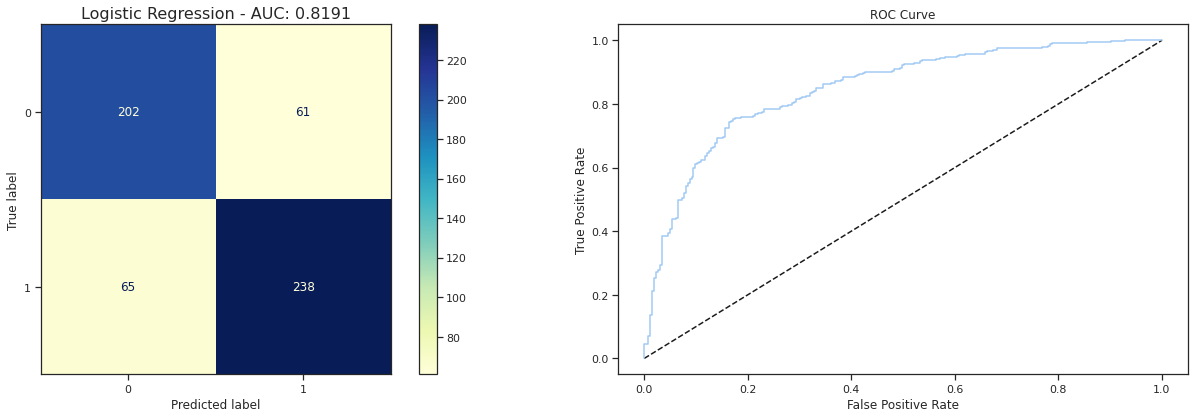

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       263
           1       0.80      0.79      0.79       303

    accuracy                           0.78       566
   macro avg       0.78      0.78      0.78       566
weighted avg       0.78      0.78      0.78       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 89.7878%
[VALIDATION] Score: 77.7385%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Logistic Regression
logReg = LogisticRegression(max_iter=150, n_jobs=-1, penalty='l2', random_state=1522)

model_training_validation(model=logReg, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Logistic Regression')

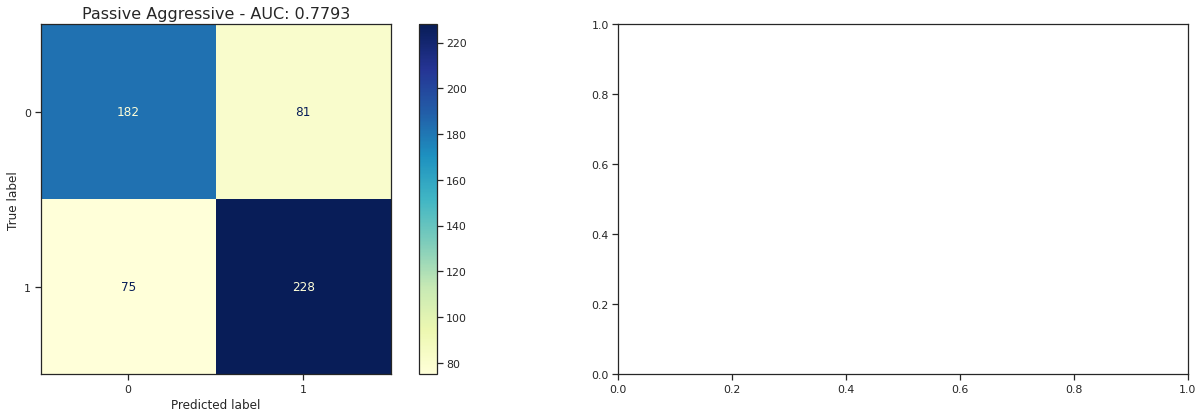

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       263
           1       0.74      0.75      0.75       303

    accuracy                           0.72       566
   macro avg       0.72      0.72      0.72       566
weighted avg       0.72      0.72      0.72       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.8674%
[VALIDATION] Score: 72.4382%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Passive Aggressive
passAgg = PassiveAggressiveClassifier(n_jobs=-1, random_state=1522)

model_training_validation(model=passAgg, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Passive Aggressive')

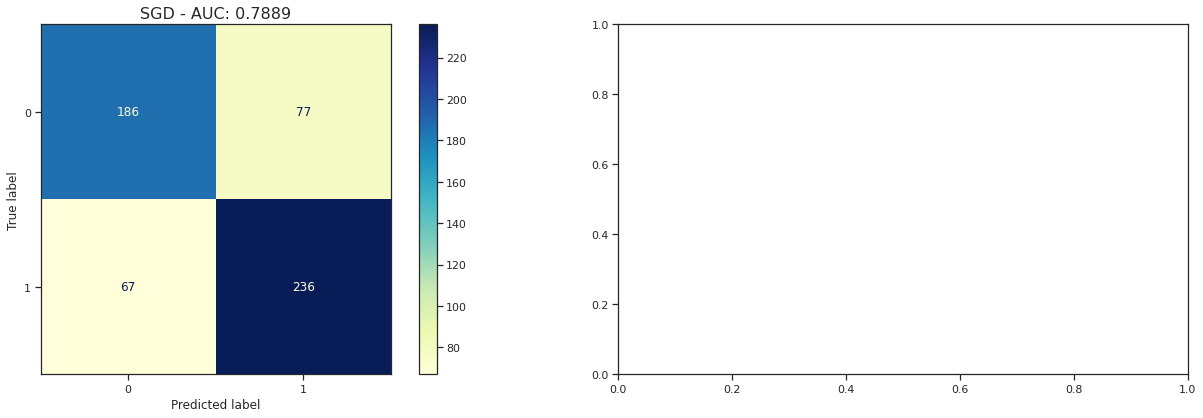

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       263
           1       0.75      0.78      0.77       303

    accuracy                           0.75       566
   macro avg       0.74      0.74      0.74       566
weighted avg       0.75      0.75      0.75       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.0274%
[VALIDATION] Score: 74.5583%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# SGD
sgd = SGDClassifier(average=True,n_jobs=-1, random_state=1522)

model_training_validation(model=sgd, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='SGD')

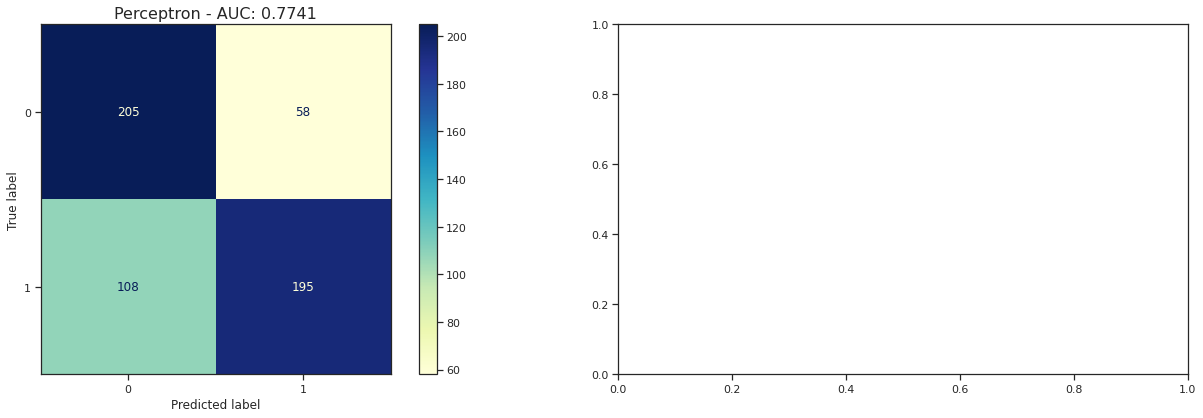

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       263
           1       0.77      0.64      0.70       303

    accuracy                           0.71       566
   macro avg       0.71      0.71      0.71       566
weighted avg       0.72      0.71      0.71       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 98.8064%
[VALIDATION] Score: 70.6714%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Perceptron
percep = Perceptron(n_jobs=-1, random_state=1522)

model_training_validation(model=percep, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Perceptron')

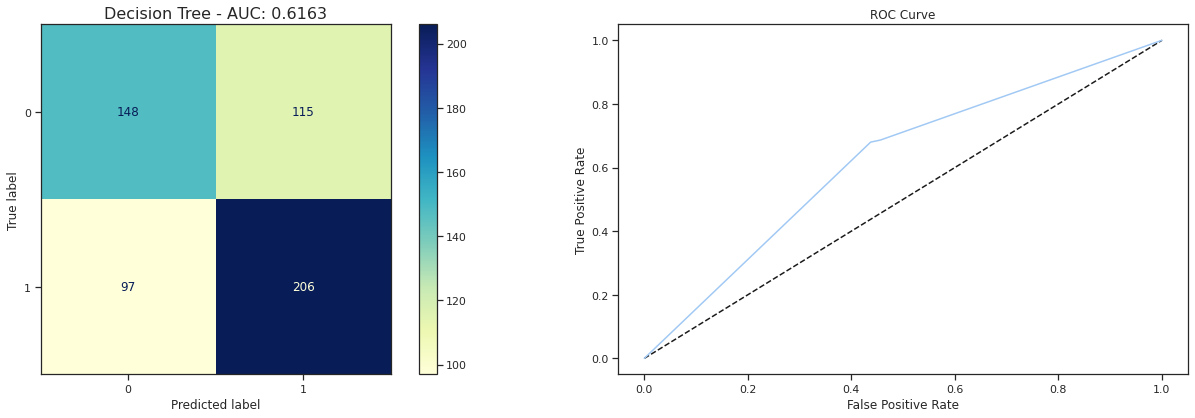

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       263
           1       0.64      0.68      0.66       303

    accuracy                           0.63       566
   macro avg       0.62      0.62      0.62       566
weighted avg       0.62      0.63      0.62       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.8674%
[VALIDATION] Score: 62.5442%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Decision Tree
decTree = DecisionTreeClassifier(criterion='gini', random_state=1522)

model_training_validation(model=decTree, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Decision Tree')

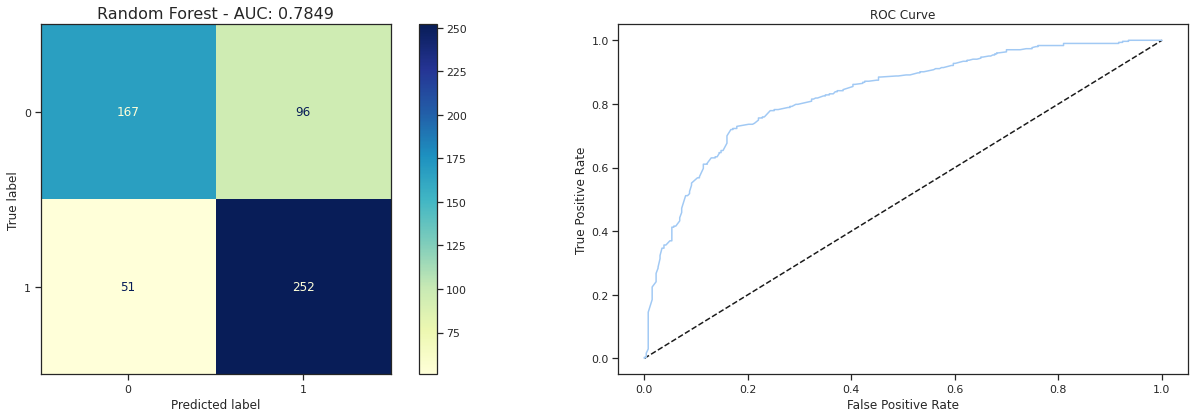

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       263
           1       0.72      0.83      0.77       303

    accuracy                           0.74       566
   macro avg       0.75      0.73      0.73       566
weighted avg       0.74      0.74      0.74       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.8674%
[VALIDATION] Score: 74.0283%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Random Forest
randFor = RandomForestClassifier(criterion='gini', n_jobs=-1, random_state=1522)

model_training_validation(model=randFor, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Random Forest')

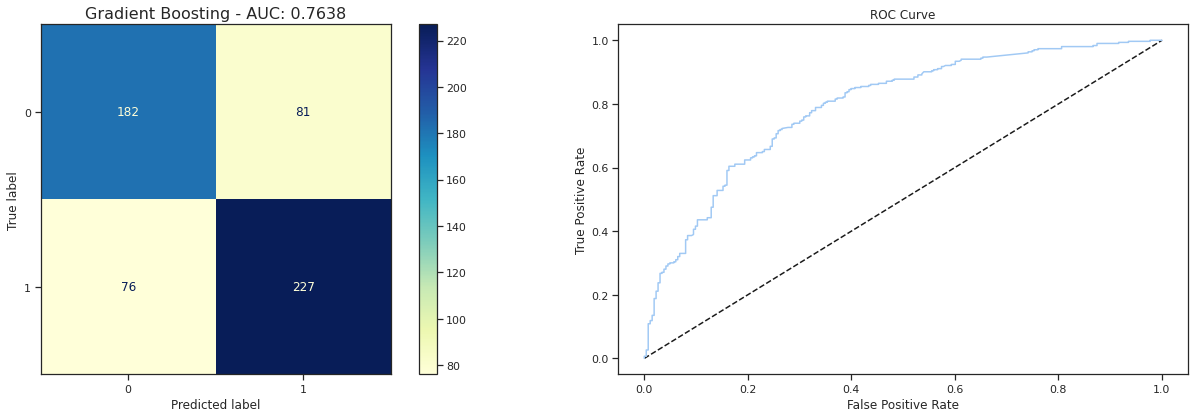

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       263
           1       0.74      0.75      0.74       303

    accuracy                           0.72       566
   macro avg       0.72      0.72      0.72       566
weighted avg       0.72      0.72      0.72       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 85.588%
[VALIDATION] Score: 72.2615%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Gradient Boosting
gradBoost = GradientBoostingClassifier(random_state=1522)

model_training_validation(model=gradBoost, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Gradient Boosting') 

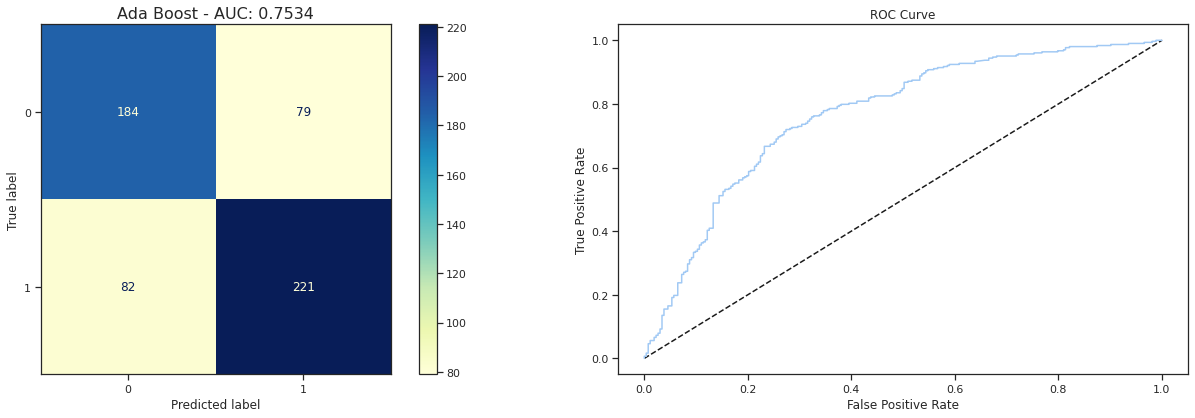

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       263
           1       0.74      0.73      0.73       303

    accuracy                           0.72       566
   macro avg       0.71      0.71      0.71       566
weighted avg       0.72      0.72      0.72       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 90.9814%
[VALIDATION] Score: 71.5548%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Ada Boost
ada = AdaBoostClassifier(n_estimators=1000, learning_rate=0.09, 
                         random_state=1522)

model_training_validation(model=ada, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Ada Boost') 

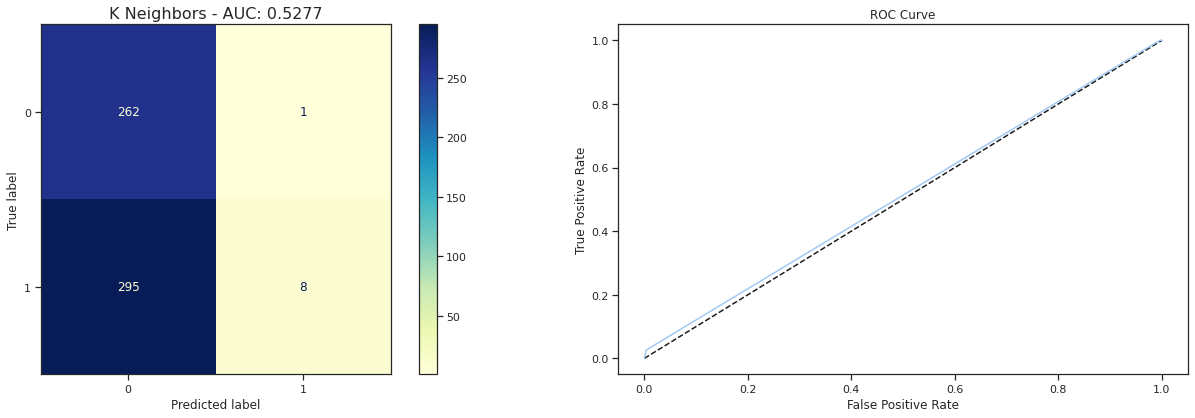

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       263
           1       0.89      0.03      0.05       303

    accuracy                           0.48       566
   macro avg       0.68      0.51      0.35       566
weighted avg       0.69      0.48      0.32       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.779%
[VALIDATION] Score: 47.7032%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# K Neighbors
kn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

model_training_validation(model=kn, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='K Neighbors') 

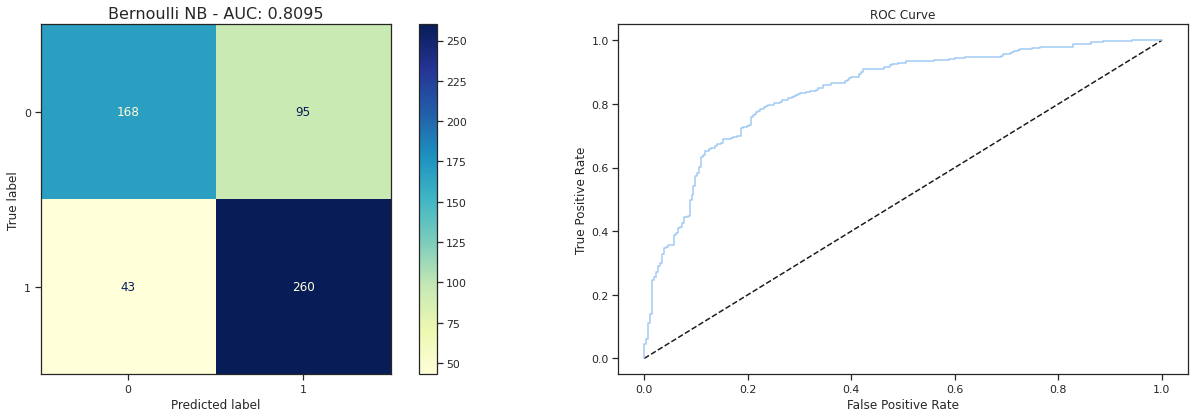

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       263
           1       0.73      0.86      0.79       303

    accuracy                           0.76       566
   macro avg       0.76      0.75      0.75       566
weighted avg       0.76      0.76      0.75       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 90.9372%
[VALIDATION] Score: 75.6184%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Bernoulli NB
bernoulli = BernoulliNB()

model_training_validation(model=bernoulli, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Bernoulli NB')

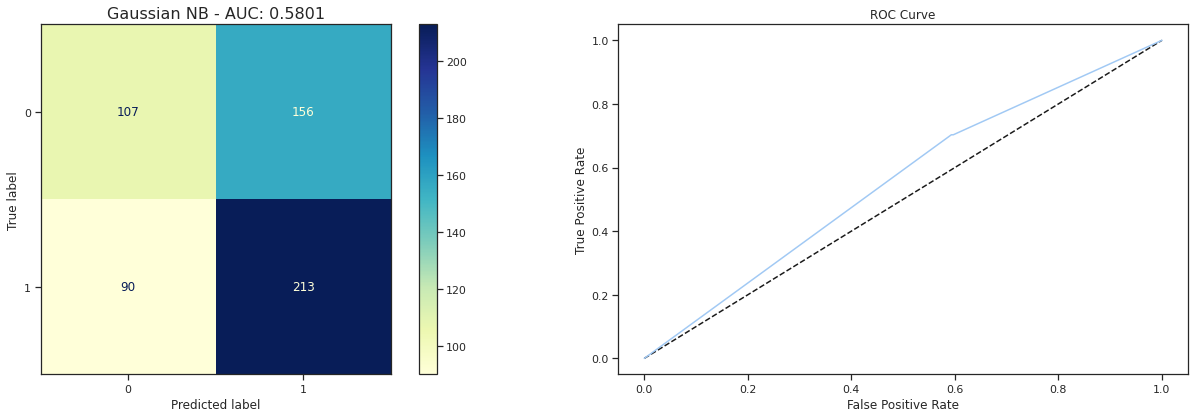

              precision    recall  f1-score   support

           0       0.54      0.41      0.47       263
           1       0.58      0.70      0.63       303

    accuracy                           0.57       566
   macro avg       0.56      0.55      0.55       566
weighted avg       0.56      0.57      0.56       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 92.3961%
[VALIDATION] Score: 56.5371%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Gaussian NB
gaussian = GaussianNB()

model_training_validation(model=gaussian, cv=5,
                          X_train=Xtrain.toarray(), X_val=Xval.toarray(),
                        #   y_train=y_train, y_val=y_val,
                          name='Gaussian NB')

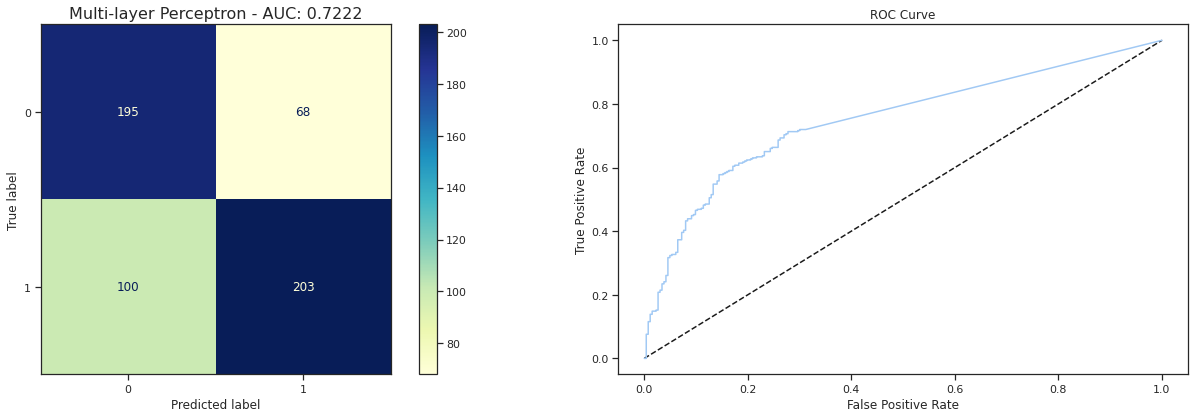

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       263
           1       0.75      0.67      0.71       303

    accuracy                           0.70       566
   macro avg       0.71      0.71      0.70       566
weighted avg       0.71      0.70      0.70       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.4695%
[VALIDATION] Score: 70.318%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 150, 50, 2), 
                    learning_rate='adaptive', 
                    activation='relu', random_state=1522)

model_training_validation(model=mlp, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Multi-layer Perceptron')

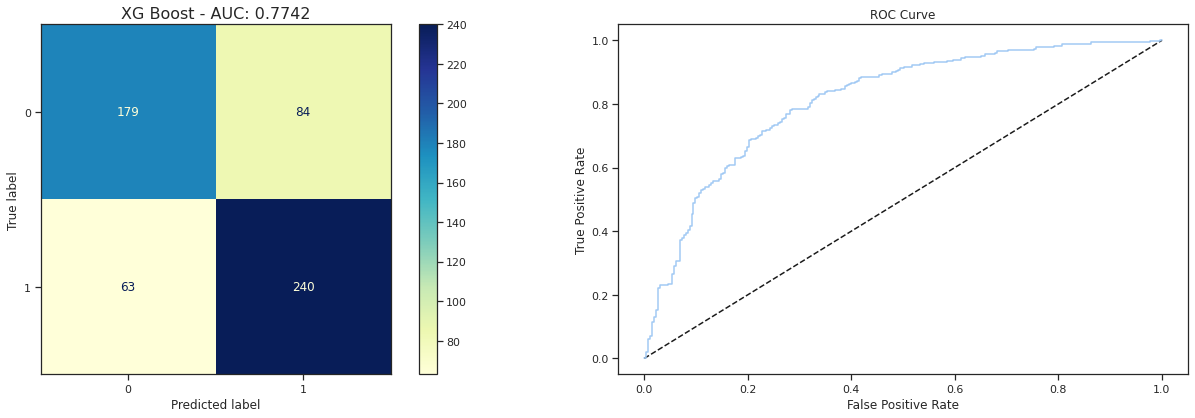

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       263
           1       0.74      0.79      0.77       303

    accuracy                           0.74       566
   macro avg       0.74      0.74      0.74       566
weighted avg       0.74      0.74      0.74       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 98.8064%
[VALIDATION] Score: 74.0283%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# XG Boost
xgBoost = XGBClassifier(n_estimators=1000, n_jobs=-1, 
                        random_state=1522)

model_training_validation(model=xgBoost, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='XG Boost')

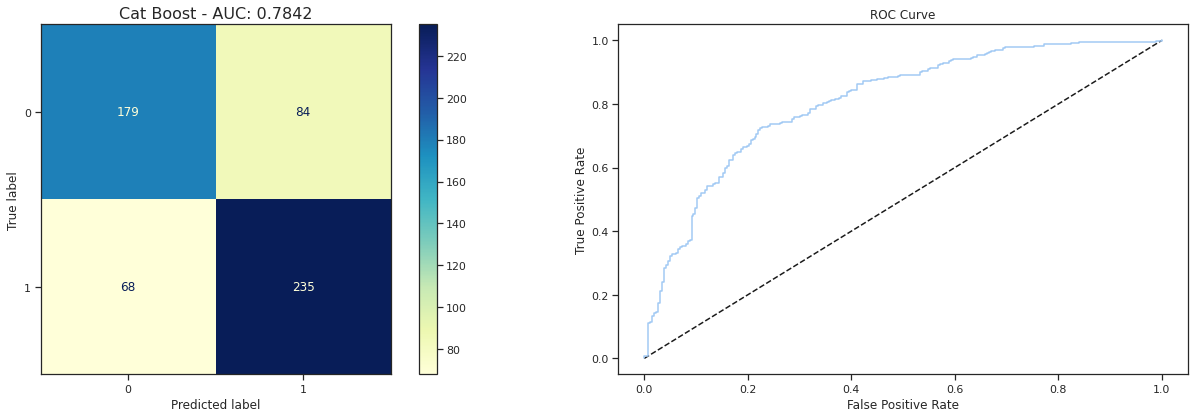

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       263
           1       0.74      0.78      0.76       303

    accuracy                           0.73       566
   macro avg       0.73      0.73      0.73       566
weighted avg       0.73      0.73      0.73       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.8674%
[VALIDATION] Score: 73.1449%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# Cat Boost
catBoost = CatBoostClassifier(n_estimators=1000, 
                              learning_rate=0.09, 
                              random_state=1522, 
                              verbose=False)

model_training_validation(model=catBoost, cv=5,
                          X_train=Xtrain, X_val=Xval,
                        #   y_train=y_train, y_val=y_val,
                          name='Cat Boost')

In [ ]:
# instanciando os 3 modelos mais promissores
mdl_1 = logReg      # [TRAIN] Score: % | [VALIDATION] Score: 77.7385%
mdl_2 = bernoulli   # [TRAIN] Score: %   | [VALIDATION] Score: 75.6184%
mdl_3 = sgd         # [TRAIN] Score: %   | [VALIDATION] Score: 74.5583%

mdl_1, mdl_2, mdl_3

(LogisticRegression(max_iter=150, n_jobs=-1, random_state=1522),
 BernoulliNB(),
 SGDClassifier(average=True, n_jobs=-1, random_state=1522))

In [ ]:
# função para plotar curva de aprendizado
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, 
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(figsize=(15, 8))

    axes.set_title(title, size=16)

    if ylim is not None:
        axes.set_ylim(*ylim)
        
    axes.set_xlabel('Nº of records')
    axes.set_ylabel('Accuracy')

    # obtenção dos dados
    train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                   train_sizes=train_sizes, return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # plotagem da curva
    axes.grid()

    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                      train_scores_mean + train_scores_std, 
                      alpha=0.1, color='r')
  
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                  test_scores_mean + test_scores_std, alpha=0.1, color='g')
  
    axes.plot(train_sizes, train_scores_mean, 'o-', color='r', 
              label='Training data')
    axes.plot(train_sizes, test_scores_mean, 'o-', color='g', 
              label='Validation data w/ cross validation')
  
    axes.legend(loc='best')
    return plt

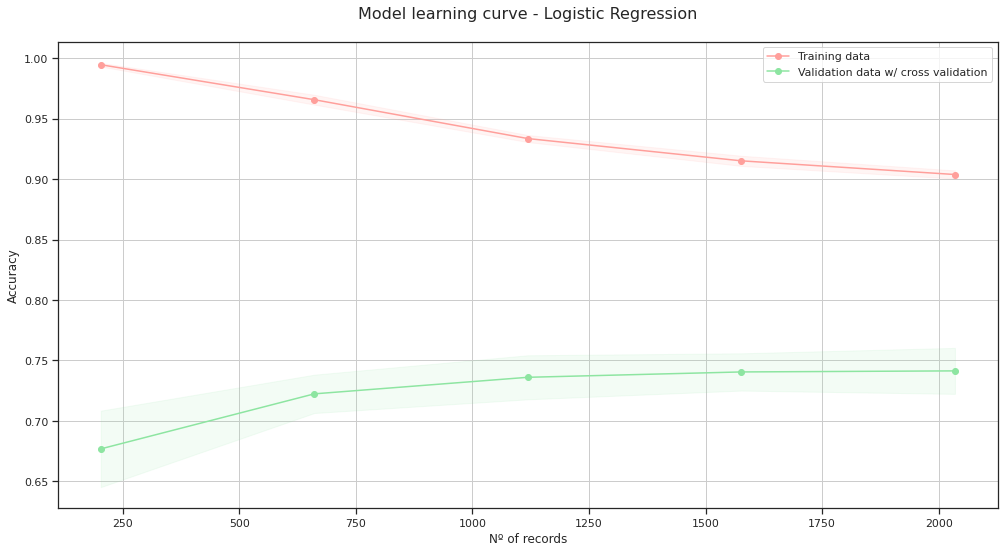

In [ ]:
# plotando a curva de aprendizado do modelo "Logistic Regression"
plot_learning_curve(logReg, title='Model learning curve - Logistic Regression\n', 
                    X=Xtrain, y=ytrain, cv=10, n_jobs=-1);

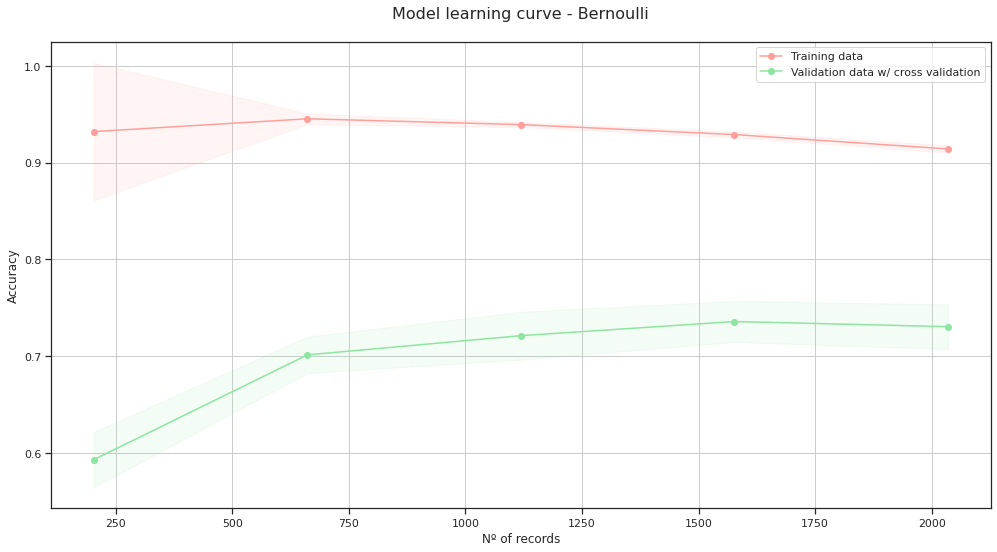

In [ ]:
# plotando a curva de aprendizado do modelo "Bernoulli"
plot_learning_curve(bernoulli, title='Model learning curve - Bernoulli\n', 
                    X=Xtrain, y=ytrain, cv=10, n_jobs=-1);

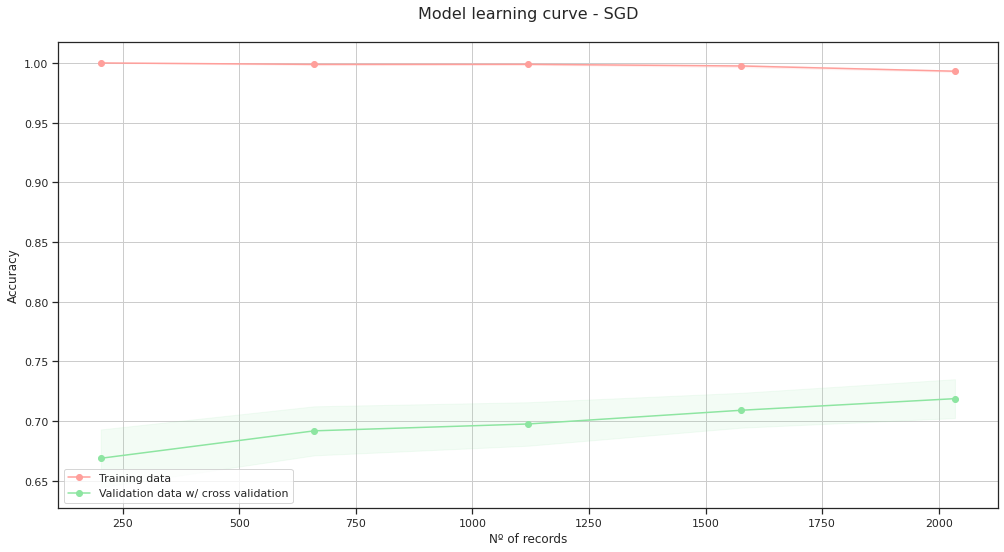

In [ ]:
# plotando a curva de aprendizado do modelo "SGDClassifier"
plot_learning_curve(sgd, title='Model learning curve - SGD\n', 
                    X=Xtrain, y=ytrain, cv=10, n_jobs=-1);

In [ ]:
# função de saída do rótulo
def outupt_label(n):
    if n == 0:
        return 'No stress'
    elif n == 1:
        return 'Stress'

In [ ]:
# função para realizar teste
def manual_testing(news):
    testing_news = {'text': [news]}

    newDf_test = pd.DataFrame(testing_news)
    newDf_test['text'] = newDf_test['text'].apply(text_preprocessing)

    newX_test = newDf_test['text']

    newXvect_test = tfidf_vector.transform(newX_test)

    pred_logReg = mdl_1.predict(newXvect_test)
    pred_bernoulli = mdl_2.predict(newXvect_test)
    pred_sgd = mdl_3.predict(newXvect_test)

    return print(
        '\n------------------------------------------------------\n'
        '\t\tCLASSIFIERS\n'
        f'Logistic Regression: {outupt_label(pred_logReg[0])}',
        f'Bernoulli          : {outupt_label(pred_bernoulli[0])}',
        f'SGD                : {outupt_label(pred_sgd[0])}',
        sep='\n'
    )

In [ ]:
# visualizando as amostras do conjunto de dados de teste
test_data_samples 

,text,label
0,During my service I got suddenly rowdy and wou...,1
1,Some monsters are real. I was abused by some a...,1
2,"So, I used tap water in a neti pot. My cold se...",0
3,"Yo, straight up. I am so goddamn sick of it. Y...",1
4,I never had that symptom before and I just wan...,1
5,"I don't have any point, I'm just overwhelmed a...",1
6,"This has been affecting me for two weeks now, ...",1
7,"Previously, I have posted on this subreddit ab...",0
8,My Social Security disability case is still wi...,0
9,I offered to help but he declined. After 6 mon...,0


In [ ]:
# instanciando a "feature" de interesse
feature = 'text'

In [ ]:
# aplicando a função "manual_testing" em cada observação do conjunto de dados de teste
## 0: No stress | 1: Stress
print('\t\tPREDICTIONS\n')
manual_testing(test_data_samples[feature][0])   # 1
manual_testing(test_data_samples[feature][1])   # 1
manual_testing(test_data_samples[feature][2])   # 0
manual_testing(test_data_samples[feature][3])   # 1
manual_testing(test_data_samples[feature][4])   # 1
manual_testing(test_data_samples[feature][5])   # 1
manual_testing(test_data_samples[feature][6])   # 1
manual_testing(test_data_samples[feature][7])   # 0
manual_testing(test_data_samples[feature][8])   # 0
manual_testing(test_data_samples[feature][9])   # 0

		PREDICTIONS


------------------------------------------------------
		CLASSIFIERS
Logistic Regression: Stress
Bernoulli          : Stress
SGD                : Stress

------------------------------------------------------
		CLASSIFIERS
Logistic Regression: Stress
Bernoulli          : Stress
SGD                : Stress

------------------------------------------------------
		CLASSIFIERS
Logistic Regression: No stress
Bernoulli          : Stress
SGD                : No stress

------------------------------------------------------
		CLASSIFIERS
Logistic Regression: Stress
Bernoulli          : Stress
SGD                : Stress

------------------------------------------------------
		CLASSIFIERS
Logistic Regression: Stress
Bernoulli          : Stress
SGD                : Stress

------------------------------------------------------
		CLASSIFIERS
Logistic Regression: Stress
Bernoulli          : Stress
SGD                : Stress

------------------------------------------------------

In [ ]:
# importando a função para realizar o "ensemble" de modelos
from sklearn.ensemble import VotingClassifier

In [ ]:
# visualizando os 3 modelos escolhidos
mdl_1, mdl_2, mdl_3

(LogisticRegression(max_iter=150, n_jobs=-1, random_state=1522),
 BernoulliNB(),
 SGDClassifier(average=True, n_jobs=-1, random_state=1522))

In [ ]:
# realizando o "ensemble" com os modelos
models_ensemble1 = VotingClassifier([ 
    ('Logistic Regressin', mdl_1),
    ('Bernoulli NB', mdl_2), 
    ('SGD', mdl_3)
])

models_ensemble1

VotingClassifier(estimators=[('Logistic Regressin',
                              LogisticRegression(max_iter=150, n_jobs=-1,
                                                 random_state=1522)),
                             ('Bernoulli NB', BernoulliNB()),
                             ('SGD',
                              SGDClassifier(average=True, n_jobs=-1,
                                            random_state=1522))])

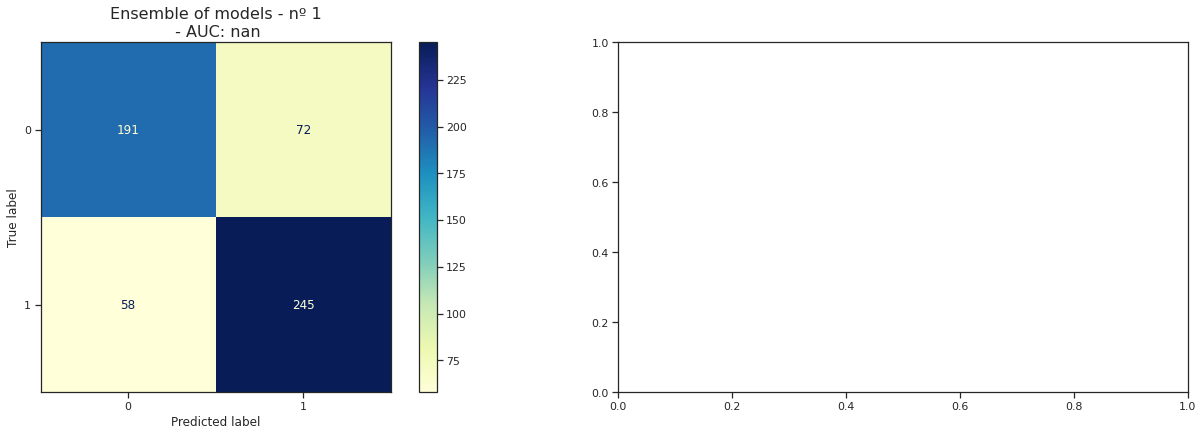

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       263
           1       0.77      0.81      0.79       303

    accuracy                           0.77       566
   macro avg       0.77      0.77      0.77       566
weighted avg       0.77      0.77      0.77       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 94.1202%
[VALIDATION] Score: 77.0318%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# realizando o treinamento do modelo "ensemble"
model_training_validation(model=models_ensemble1, cv=10, 
                          X_train=Xtrain, X_val=Xval,
                          name='Ensemble of models - nº 1\n')

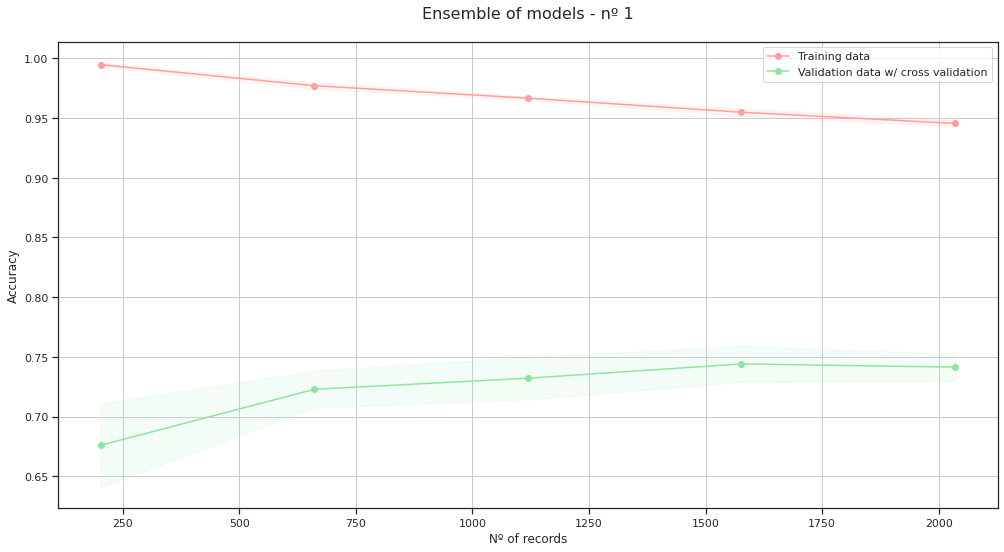

In [ ]:
# plotando a curva de aprendizagem do modelo
plot_learning_curve(models_ensemble1, 
                    title='Ensemble of models - nº 1\n', 
                    X=Xtrain, y=ytrain, cv=10, n_jobs=-1);

In [ ]:
# função para realizar teste
def manual_testing_ensemble(news):
    testing_news = {'text': [news]}

    newDf_test = pd.DataFrame(testing_news)
    newDf_test['text'] = newDf_test['text'].apply(text_preprocessing)

    newX_test = newDf_test['text']

    newXvect_test = tfidf_vector.transform(newX_test)

    pred_ = models_ensemble1.predict(newXvect_test)

    return print(
        '+' * 80,
        '\t\t\tCLASSIFIERS\n'
        f'\t[ENSEMBLE nº 1] - Logistic Regression, Bernoulli NB & SGD: {outupt_label(pred_[0])}\n',
        sep='\n'
    )

In [ ]:
# instanciando a "feature" de interesse
feature = 'text'

In [ ]:
# visualizando as amostras do conjunto de dados de teste
test_data_samples 

,text,label
0,During my service I got suddenly rowdy and wou...,1
1,Some monsters are real. I was abused by some a...,1
2,"So, I used tap water in a neti pot. My cold se...",0
3,"Yo, straight up. I am so goddamn sick of it. Y...",1
4,I never had that symptom before and I just wan...,1
5,"I don't have any point, I'm just overwhelmed a...",1
6,"This has been affecting me for two weeks now, ...",1
7,"Previously, I have posted on this subreddit ab...",0
8,My Social Security disability case is still wi...,0
9,I offered to help but he declined. After 6 mon...,0


In [ ]:
# aplicando a função "manual_testing_ensemble" em cada observação do conjunto de dados de teste
## 0: No stress | 1: Stress
print('\t\tPREDICTIONS\n')
manual_testing_ensemble(test_data_samples[feature][0])   # 1
manual_testing_ensemble(test_data_samples[feature][1])   # 1
manual_testing_ensemble(test_data_samples[feature][2])   # 0
manual_testing_ensemble(test_data_samples[feature][3])   # 1
manual_testing_ensemble(test_data_samples[feature][4])   # 1
manual_testing_ensemble(test_data_samples[feature][5])   # 1
manual_testing_ensemble(test_data_samples[feature][6])   # 1
manual_testing_ensemble(test_data_samples[feature][7])   # 0
manual_testing_ensemble(test_data_samples[feature][8])   # 0
manual_testing_ensemble(test_data_samples[feature][9])   # 0

		PREDICTIONS

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 1] - Logistic Regression, Bernoulli NB & SGD: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 1] - Logistic Regression, Bernoulli NB & SGD: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 1] - Logistic Regression, Bernoulli NB & SGD: No stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 1] - Logistic Regression, Bernoulli NB & SGD: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 1] - Logistic Regression, Bernoulli NB & SGD: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 1] - Logistic Regression, Bernoulli NB & SGD: Stress

In [ ]:
# realizando o "ensemble" com os modelos
models_ensemble2 = VotingClassifier([ 
    ('Cat Boost', catBoost),
    ('XG Boost', xgb)]
)

models_ensemble2

VotingClassifier(estimators=[('Cat Boost',
                              <catboost.core.CatBoostClassifier object at 0x7fe5574757f0>),
                             ('XG Boost',
                              XGBClassifier(n_estimators=1000, n_jobs=-1,
                                            random_state=1522))])

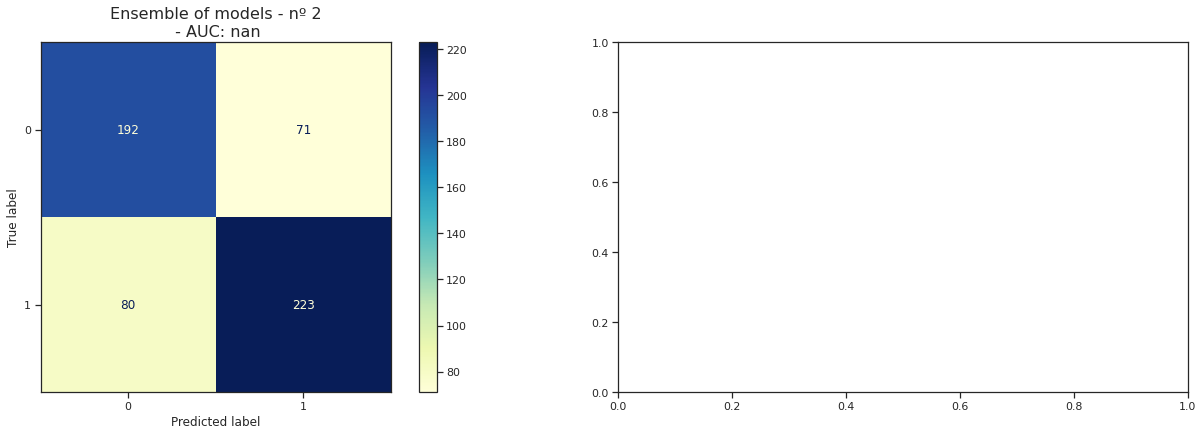

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       263
           1       0.76      0.74      0.75       303

    accuracy                           0.73       566
   macro avg       0.73      0.73      0.73       566
weighted avg       0.73      0.73      0.73       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.0274%
[VALIDATION] Score: 73.3216%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# realizando o treinamento do modelo "ensemble"
model_training_validation(model=models_ensemble2, cv=10, 
                          X_train=Xtrain, X_val=Xval,
                          name='Ensemble of models - nº 2\n')

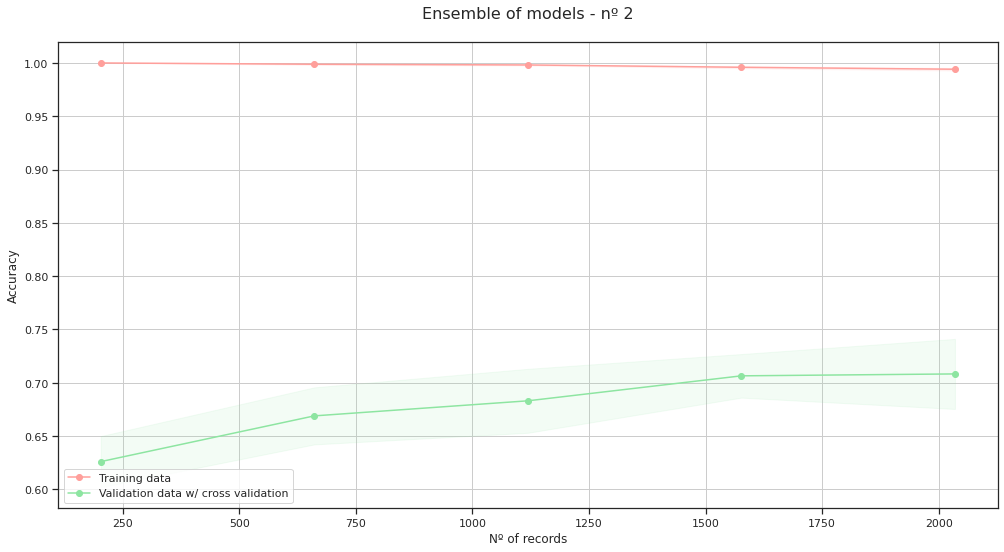

In [ ]:
# plotando a curva de aprendizagem do modelo
plot_learning_curve(models_ensemble2, 
                    title='Ensemble of models - nº 2\n', 
                    X=Xtrain, y=ytrain, cv=10, n_jobs=-1);

In [ ]:
# função para realizar teste
def manual_testing_ensemble(news):
    testing_news = {'text': [news]}

    newDf_test = pd.DataFrame(testing_news)
    newDf_test['text'] = newDf_test['text'].apply(text_preprocessing)

    newX_test = newDf_test['text']

    newXvect_test = tfidf_vector.transform(newX_test)

    pred_ = models_ensemble2.predict(newXvect_test)

    return print(
        '+' * 80,
        '\t\t\tCLASSIFIERS\n'
        f'\t[ENSEMBLE nº 2] - Cat & XG Boost: {outupt_label(pred_[0])}\n',
        sep='\n'
    )

In [ ]:
# aplicando a função "manual_testing_ensemble" em cada observação do conjunto de dados de teste
## 0: No stress | 1: Stress
print('\t\tPREDICTIONS\n')
manual_testing_ensemble(test_data_samples[feature][0])   # 1
manual_testing_ensemble(test_data_samples[feature][1])   # 1
manual_testing_ensemble(test_data_samples[feature][2])   # 0
manual_testing_ensemble(test_data_samples[feature][3])   # 1
manual_testing_ensemble(test_data_samples[feature][4])   # 1
manual_testing_ensemble(test_data_samples[feature][5])   # 1
manual_testing_ensemble(test_data_samples[feature][6])   # 1
manual_testing_ensemble(test_data_samples[feature][7])   # 0
manual_testing_ensemble(test_data_samples[feature][8])   # 0
manual_testing_ensemble(test_data_samples[feature][9])   # 0

		PREDICTIONS

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 2] - Cat & XG Boost: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 2] - Cat & XG Boost: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 2] - Cat & XG Boost: No stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 2] - Cat & XG Boost: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 2] - Cat & XG Boost: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 2] - Cat & XG Boost: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 2] - Cat & XG Boost: Stress

+++++++++

In [ ]:
# realizando o "ensemble" com os modelos
models_ensemble3 = VotingClassifier([ 
    ('Logistic Regressin', logReg),
    ('Random Forest', randFor), 
    ('Perceptron', percep)
])

models_ensemble3

VotingClassifier(estimators=[('Logistic Regressin',
                              LogisticRegression(max_iter=150, n_jobs=-1,
                                                 random_state=1522)),
                             ('Random Forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=1522)),
                             ('Perceptron',
                              Perceptron(n_jobs=-1, random_state=1522))])

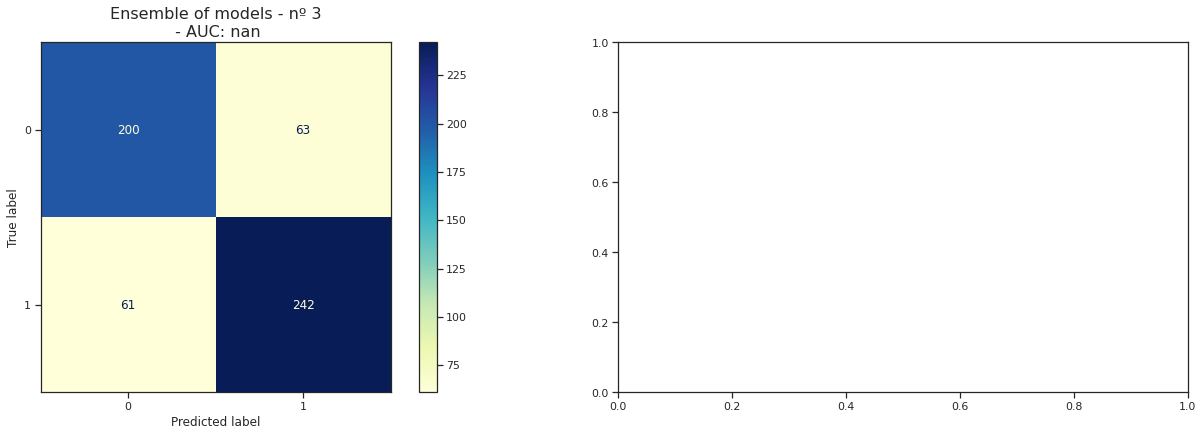

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       263
           1       0.79      0.80      0.80       303

    accuracy                           0.78       566
   macro avg       0.78      0.78      0.78       566
weighted avg       0.78      0.78      0.78       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 99.4695%
[VALIDATION] Score: 78.0919%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# realizando o treinamento do modelo "ensemble"
model_training_validation(model=models_ensemble3, cv=10, 
                          X_train=Xtrain, X_val=Xval,
                          name='Ensemble of models - nº 3\n')

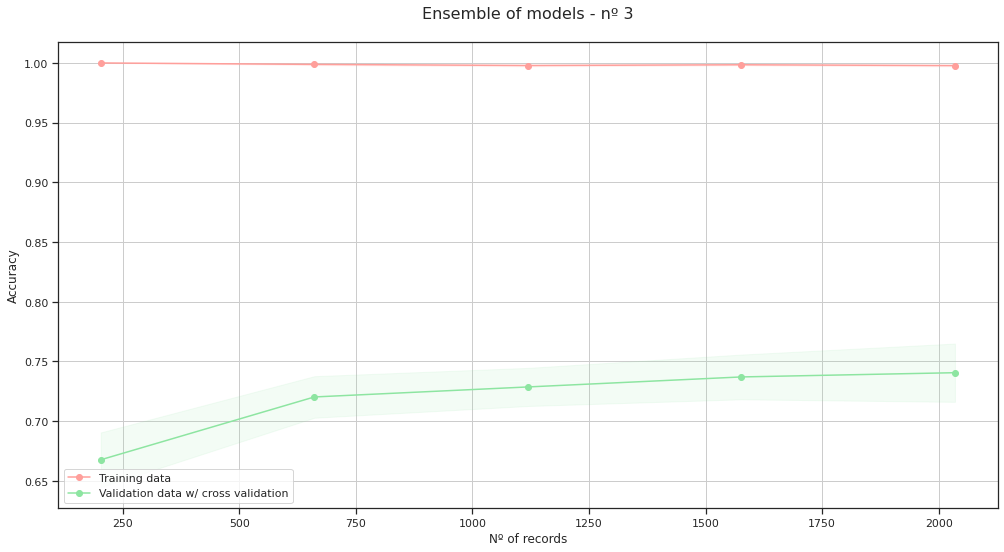

In [ ]:
# plotando a curva de aprendizagem do modelo
plot_learning_curve(models_ensemble3, 
                    title='Ensemble of models - nº 3\n', 
                    X=Xtrain, y=ytrain, cv=10, n_jobs=-1);

In [ ]:
# função para realizar teste
def manual_testing_ensemble(news):
    testing_news = {'text': [news]}

    newDf_test = pd.DataFrame(testing_news)
    newDf_test['text'] = newDf_test['text'].apply(text_preprocessing)

    newX_test = newDf_test['text']

    newXvect_test = tfidf_vector.transform(newX_test)

    pred_ = models_ensemble3.predict(newXvect_test)

    return print(
        '+' * 80,
        '\t\t\tCLASSIFIERS\n'
        f'\t[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Perceptron: {outupt_label(pred_[0])}\n',
        sep='\n'
    )

In [ ]:
# aplicando a função "manual_testing_ensemble" em cada observação do conjunto de dados de teste
## 0: No stress | 1: Stress
print('\t\tPREDICTIONS\n')
manual_testing_ensemble(test_data_samples[feature][0])   # 1
manual_testing_ensemble(test_data_samples[feature][1])   # 1
manual_testing_ensemble(test_data_samples[feature][2])   # 0
manual_testing_ensemble(test_data_samples[feature][3])   # 1
manual_testing_ensemble(test_data_samples[feature][4])   # 1
manual_testing_ensemble(test_data_samples[feature][5])   # 1
manual_testing_ensemble(test_data_samples[feature][6])   # 1
manual_testing_ensemble(test_data_samples[feature][7])   # 0
manual_testing_ensemble(test_data_samples[feature][8])   # 0
manual_testing_ensemble(test_data_samples[feature][9])   # 0

		PREDICTIONS

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Perceptron: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Perceptron: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Perceptron: No stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Perceptron: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Perceptron: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logisti

In [ ]:
# realizando o "ensemble" com os modelos
models_ensemble4 = VotingClassifier([ 
    ('Logistic Regressin', logReg),
    ('Random Forest', randFor), 
    ('Bernoulli NB', bernoulli)
])

models_ensemble4

VotingClassifier(estimators=[('Logistic Regressin',
                              LogisticRegression(max_iter=150, n_jobs=-1,
                                                 random_state=1522)),
                             ('Random Forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=1522)),
                             ('Bernoulli NB', BernoulliNB())])

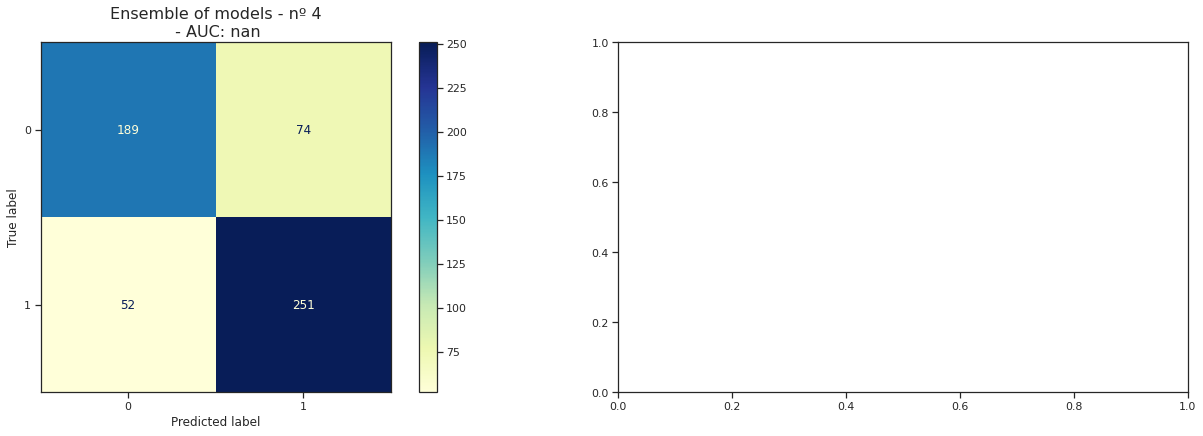

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       263
           1       0.77      0.83      0.80       303

    accuracy                           0.78       566
   macro avg       0.78      0.77      0.77       566
weighted avg       0.78      0.78      0.78       566

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[TRAIN] Score     : 94.2087%
[VALIDATION] Score: 77.7385%
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
# realizando o treinamento do modelo "ensemble"
model_training_validation(model=models_ensemble4, cv=10, 
                          X_train=Xtrain, X_val=Xval,
                          name='Ensemble of models - nº 4\n')

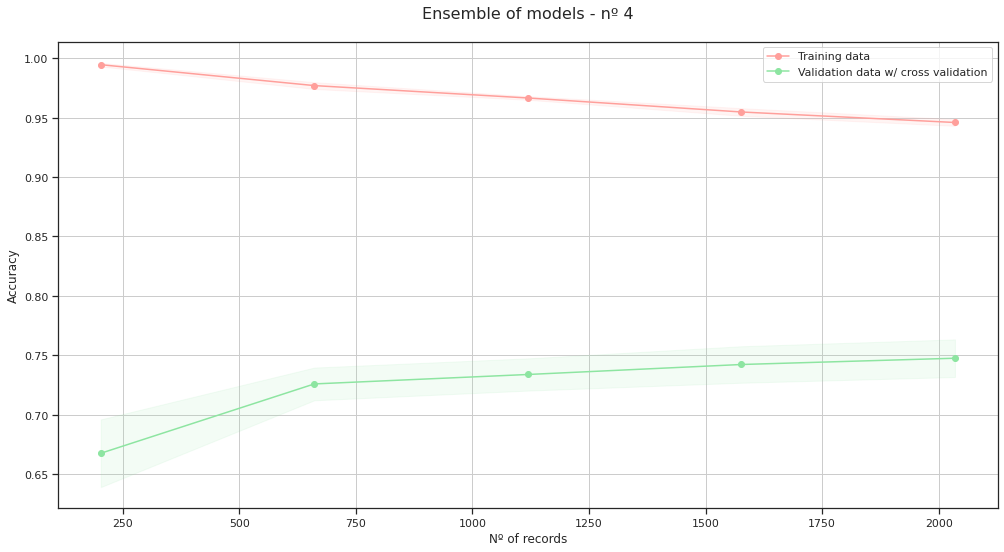

In [ ]:
# plotando a curva de aprendizagem do modelo
plot_learning_curve(models_ensemble4, 
                    title='Ensemble of models - nº 4\n', 
                    X=Xtrain, y=ytrain, cv=10, n_jobs=-1);

In [ ]:
# função para realizar teste
def manual_testing_ensemble(news):
    testing_news = {'text': [news]}

    newDf_test = pd.DataFrame(testing_news)
    newDf_test['text'] = newDf_test['text'].apply(text_preprocessing)

    newX_test = newDf_test['text']

    newXvect_test = tfidf_vector.transform(newX_test)

    pred_ = models_ensemble4.predict(newXvect_test)

    return print(
        '+' * 80,
        '\t\t\tCLASSIFIERS\n'
        f'\t[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Bernoulli: {outupt_label(pred_[0])}\n',
        sep='\n'
    )

In [ ]:
# aplicando a função "manual_testing_ensemble" em cada observação do conjunto de dados de teste
## 0: No stress | 1: Stress
print('\t\tPREDICTIONS\n')
manual_testing_ensemble(test_data_samples[feature][0])   # 1
manual_testing_ensemble(test_data_samples[feature][1])   # 1
manual_testing_ensemble(test_data_samples[feature][2])   # 0
manual_testing_ensemble(test_data_samples[feature][3])   # 1
manual_testing_ensemble(test_data_samples[feature][4])   # 1
manual_testing_ensemble(test_data_samples[feature][5])   # 1
manual_testing_ensemble(test_data_samples[feature][6])   # 1
manual_testing_ensemble(test_data_samples[feature][7])   # 0
manual_testing_ensemble(test_data_samples[feature][8])   # 0
manual_testing_ensemble(test_data_samples[feature][9])   # 0

		PREDICTIONS

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Bernoulli: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Bernoulli: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Bernoulli: No stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Bernoulli: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Regression, Random Forest & Bernoulli: Stress

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			CLASSIFIERS
	[ENSEMBLE nº 3] - Logistic Reg

In [ ]:
%whos

Variable                      Type                           Data/Info
----------------------------------------------------------------------
AdaBoostClassifier            ABCMeta                        <class 'sklearn.ensemble.<...>ting.AdaBoostClassifier'>
BernoulliNB                   ABCMeta                        <class 'sklearn.naive_bayes.BernoulliNB'>
CatBoostClassifier            type                           <class 'catboost.core.CatBoostClassifier'>
ConfusionMatrixDisplay        type                           <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
CountVectorizer               type                           <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
DecisionTreeClassifier        ABCMeta                        <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GaussianNB                    ABCMeta                        <class 'sklearn.naive_bayes.GaussianNB'>
GradientBoostingClassifier    ABCMeta                        <class 'sklearn.ense

In [ ]:
%who_ls

['AdaBoostClassifier',
 'BernoulliNB',
 'CatBoostClassifier',
 'ConfusionMatrixDisplay',
 'CountVectorizer',
 'DecisionTreeClassifier',
 'GaussianNB',
 'GradientBoostingClassifier',
 'ImageColorGenerator',
 'KNeighborsClassifier',
 'LogisticRegression',
 'MLPClassifier',
 'PassiveAggressiveClassifier',
 'Perceptron',
 'RandomForestClassifier',
 'SGDClassifier',
 'STOPWORDS',
 'TfidfVectorizer',
 'VotingClassifier',
 'WordCloud',
 'X',
 'XGBClassifier',
 'X_cv',
 'X_tfidf',
 'Xtrain',
 'Xval',
 'ada',
 'bernoulli',
 'catBoost',
 'classification_report',
 'count_vector',
 'cross_val_score',
 'data',
 'data_',
 'data_0',
 'data_1',
 'data_2',
 'data_3',
 'data_4',
 'data_5',
 'data_6',
 'data_7',
 'data_8',
 'data_9',
 'decTree',
 'ensemble1',
 'ensemble2',
 'ensemble3',
 'feature',
 'gaussian',
 'get_ipython',
 'gradBoost',
 'kn',
 'learning_curve',
 'logReg',
 'manual_testing',
 'manual_testing_ensemble',
 'mdl_1',
 'mdl_2',
 'mdl_3',
 'mlp',
 'model_score',
 'model_score2',
 'model_tra

In [ ]:
# removendo o arquivo do ambiente
%rm -rf stress.csv